#### ~~~~~~~~~~~~~~~~~~~~~~~~~ Carac - Exploration, nettoyage des données et DataViz ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import missingno as msno



In [2]:
import datetime as dt

from google.colab import files
import io

uploaded = files.upload()

In [231]:
#carac = pd.read_csv(io.BytesIO(uploaded["caracteristiques.csv"]), error_bad_lines=False, sep=',', encoding='latin-1')
carac = pd.read_csv("caracteristiques.csv", encoding='latin-1', low_memory=False)
carac.head(10)

,Unnamed: 0,num_acc,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,annee
0,1,200500000001,1,12,1900,3,2,1,1.0,3.0,11,CD41B,M,5051500,294400,590,2005
1,2,200500000002,1,21,1600,1,2,1,1.0,1.0,51,rue de Lille,M,5053700,280200,590,2005
2,3,200500000003,1,21,1845,3,1,1,2.0,1.0,51,NaN,M,5054600,280000,590,2005
3,4,200500000004,1,4,1615,1,1,1,1.0,5.0,82,NaN,M,5098700,240800,590,2005
4,5,200500000005,1,10,1945,3,1,1,3.0,6.0,478,NaN,M,5096400,247500,590,2005
5,6,200500000006,1,28,1415,1,1,1,8.0,6.0,82,NaN,M,5099500,239700,590,2005
6,7,200500000007,1,3,1530,1,1,1,1.0,3.0,130,NaN,M,0,0,590,2005
7,8,200500000008,1,18,2115,5,2,1,2.0,6.0,404,le hameau du lac,M,5105200,253300,590,2005
8,9,200500000009,1,25,1715,1,1,2,8.0,3.0,309,NaN,M,5097300,257100,590,2005
9,10,200500000010,1,29,2015,3,1,1,2.0,6.0,260,NaN,M,5106500,252400,590,2005


In [4]:
carac.head(20)

,Unnamed: 0,num_acc,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,annee
0,1,200500000001,1,12,1900,3,2,1,1.0,3.0,11,CD41B,M,5051500.0,294400.0,590,2005
1,2,200500000002,1,21,1600,1,2,1,1.0,1.0,51,rue de Lille,M,5053700.0,280200.0,590,2005
2,3,200500000003,1,21,1845,3,1,1,2.0,1.0,51,NaN,M,5054600.0,280000.0,590,2005
3,4,200500000004,1,4,1615,1,1,1,1.0,5.0,82,NaN,M,5098700.0,240800.0,590,2005
4,5,200500000005,1,10,1945,3,1,1,3.0,6.0,478,NaN,M,5096400.0,247500.0,590,2005
5,6,200500000006,1,28,1415,1,1,1,8.0,6.0,82,NaN,M,5099500.0,239700.0,590,2005
6,7,200500000007,1,3,1530,1,1,1,1.0,3.0,130,NaN,M,0.0,0.0,590,2005
7,8,200500000008,1,18,2115,5,2,1,2.0,6.0,404,le hameau du lac,M,5105200.0,253300.0,590,2005
8,9,200500000009,1,25,1715,1,1,2,8.0,3.0,309,NaN,M,5097300.0,257100.0,590,2005
9,10,200500000010,1,29,2015,3,1,1,2.0,6.0,260,NaN,M,5106500.0,252400.0,590,2005


In [5]:
carac.shape

(1121571, 17)

In [6]:
carac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121571 entries, 0 to 1121570
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1121571 non-null  int64  
 1   num_acc     1121571 non-null  int64  
 2   mois        1121571 non-null  int64  
 3   jour        1121571 non-null  int64  
 4   hrmn        1121571 non-null  object 
 5   lum         1121571 non-null  int64  
 6   agg         1121571 non-null  int64  
 7   int         1121571 non-null  int64  
 8   atm         1121498 non-null  float64
 9   col         1121552 non-null  float64
 10  com         1121569 non-null  object 
 11  adr         978295 non-null   object 
 12  gps         643154 non-null   object 
 13  lat         634503 non-null   object 
 14  long        634499 non-null   object 
 15  dep         1121571 non-null  object 
 16  annee       1121571 non-null  int64  
dtypes: float64(2), int64(8), object(7)
memory usage: 145.5+ MB


In [7]:
### Gestion des doublons ###
carac.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1121566    False
1121567    False
1121568    False
1121569    False
1121570    False
Length: 1121571, dtype: bool

In [8]:
# Le dataset carac ne contient aucuns doublons

In [9]:
### Gestion des valeurs manquantes ###

# 1. Détection et calcul du nombre de colonnes qui contiennent des NANs
colonnes_nans = carac.isna().any(axis=0).sum()
print(colonnes_nans, 'colonnes de carac contiennent des NANs. \n')

7 colonnes de carac contiennent des NANs. 



In [10]:
# 2. Détection et calcul du nombre de lignes qui contiennent des NANs
lignes_nans = carac.isna().any(axis=1).sum()
print(lignes_nans, 'lignes de carac contiennent des NANs. \n')

628744 lignes de carac contiennent des NANs. 



In [11]:
# 3. Nombre de NANs par colonne
colonnes_nbnans = carac.isna().sum(axis=0)
print('La colonne contenant le plus de NANs est:', colonnes_nbnans.idxmax())

La colonne contenant le plus de NANs est: long


In [12]:
# 4. Synthèse et affichage du nombre total de NANs par colonne
carac.isna().sum()

Unnamed: 0         0
num_acc            0
mois               0
jour               0
hrmn               0
lum                0
agg                0
int                0
atm               73
col               19
com                2
adr           143276
gps           478417
lat           487068
long          487072
dep                0
annee              0
dtype: int64

In [13]:
# 5. Taux de NANs concernant les colonnes concernées
# 5.1 = long : 43.42 %
# 5.2 = lat : 43.41 %
# 5.3 = gps : 42.65 %
# 5.4 = adr : 12.77 %

**Les deux cellules de code suivantes modifiées car les 0 sont une valeurs donc on ne peut pas remplacer les NAN par une valeur sans faire une exploration de chaque variable au préalable :**

In [ ]:
# 5. Remplacement des valeurs manquantes
# Les variables explicatives 'adr', 'gps', 'lat' et 'long' de type catégorielle peuvent être remplacées soit :
# avec le mode (la modalité la plus fréquente) : non pertinent dans le cas présent
# par une constante 0 ou -1

# carac['long'] = carac['long'].fillna(0)
# carac['lat'] = carac['lat'].fillna(0)
# carac['gps'] = carac['gps'].fillna(0)
# carac['adr'] = carac['adr'].fillna(0)

In [ ]:
# 6. On vérifie que ces 4 colonnes ne contiennent plus de NANs
# carac[['long', 'lat', 'gps', 'adr']].isna().sum()

long    0
lat     0
gps     0
adr     0
dtype: int64

In [14]:
# 7. Nombre de valeurs uniques
for colname in carac.columns:
  print(f"Nombre de valeurs uniques dans la colonne {colname}: ", carac[colname].nunique())

Nombre de valeurs uniques dans la colonne Unnamed: 0:  1121571
Nombre de valeurs uniques dans la colonne num_acc:  1121571
Nombre de valeurs uniques dans la colonne mois:  12
Nombre de valeurs uniques dans la colonne jour:  31
Nombre de valeurs uniques dans la colonne hrmn:  3735
Nombre de valeurs uniques dans la colonne lum:  6
Nombre de valeurs uniques dans la colonne agg:  2
Nombre de valeurs uniques dans la colonne int:  11
Nombre de valeurs uniques dans la colonne atm:  10
Nombre de valeurs uniques dans la colonne col:  8
Nombre de valeurs uniques dans la colonne com:  20035
Nombre de valeurs uniques dans la colonne adr:  468169
Nombre de valeurs uniques dans la colonne gps:  10
Nombre de valeurs uniques dans la colonne lat:  330856
Nombre de valeurs uniques dans la colonne long:  371173
Nombre de valeurs uniques dans la colonne dep:  220
Nombre de valeurs uniques dans la colonne annee:  17


**Cellule suivante modifiée car indexation trop tôt, à faire après la fusion**

In [ ]:
# 8. On redéfinit l'index de notre DataFrame carac avec le numéro d'identifiant de l'accident
# carac.index = carac['num_acc']
# display(carac.head())

,Unnamed: 0,num_acc,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,annee
num_acc,,,,,,,,,,,,,,,,,
200500000001,1,200500000001,1,12,1900,3,2,1,1.0,3.0,11,CD41B,M,5051500,294400,590,2005
200500000002,2,200500000002,1,21,1600,1,2,1,1.0,1.0,51,rue de Lille,M,5053700,280200,590,2005
200500000003,3,200500000003,1,21,1845,3,1,1,2.0,1.0,51,0,M,5054600,280000,590,2005
200500000004,4,200500000004,1,4,1615,1,1,1,1.0,5.0,82,0,M,5098700,240800,590,2005
200500000005,5,200500000005,1,10,1945,3,1,1,3.0,6.0,478,0,M,5096400,247500,590,2005


**Cellule suivante reportée à la fin pour pas supprimer tout de suite Unnamed et pas suppression de "num_acc" : **

In [ ]:
# 9. On supprime les colonnes 'Unnamed: 0' et 'num_acc'
# carac = carac.drop(['Unnamed: 0', 'num_acc'], axis=1)
# display(carac.head())

,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,annee
num_acc,,,,,,,,,,,,,,,
200500000001,1,12,1900,3,2,1,1.0,3.0,11,CD41B,M,5051500,294400,590,2005
200500000002,1,21,1600,1,2,1,1.0,1.0,51,rue de Lille,M,5053700,280200,590,2005
200500000003,1,21,1845,3,1,1,2.0,1.0,51,0,M,5054600,280000,590,2005
200500000004,1,4,1615,1,1,1,1.0,5.0,82,0,M,5098700,240800,590,2005
200500000005,1,10,1945,3,1,1,3.0,6.0,478,0,M,5096400,247500,590,2005


In [ ]:
### Pertinence métier des variables 'col', 'int', 'lum', 'atm', 'jour', 'mois', 'année'
# Il me semble judicieux d'analyser plus précisément ces features qui seront pertinentes dans la prédiction
# de la gravité d'un accident

In [15]:
carac['col'].dtype

dtype('float64')

In [232]:
carac.col = carac.col.astype('category') 
assert carac.col.dtype == 'category'

In [233]:
correspondances = { -1: 'Non renseigné', 1: 'Deux véhicules - frontale', 2: 'Deux véhicules – par l’arrière', 
                   3: 'Deux véhicules – par le coté', 4: 'Trois véhicules et plus – en chaîne', 
                   5: 'Trois véhicules et plus - collisions multiples', 6: 'Autre collision', 7: 'Sans collision' } 
carac['col'] = carac['col'].replace(correspondances)

In [18]:
# Calcul du nombre d'occurences de chaque modalité de la variable 'col'
carac['col'].value_counts()

Autre collision                                   365928
Deux véhicules – par le coté                      324774
Deux véhicules – par l’arrière                    132759
Sans collision                                    115221
Deux véhicules - frontale                         109683
Trois véhicules et plus – en chaîne                35941
Trois véhicules et plus - collisions multiples     35709
Non renseigné                                       1537
Name: col, dtype: int64

Mois de l'accident

In [19]:
carac['mois'].dtype

dtype('int64')

In [20]:
carac['mois'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [234]:
# Conversion de la colonne "mois" au format "date"
carac.mois = pd.to_datetime(carac.mois, format='%m')

In [22]:
carac['mois'].unique()

array(['1900-01-01T00:00:00.000000000', '1900-02-01T00:00:00.000000000',
       '1900-03-01T00:00:00.000000000', '1900-04-01T00:00:00.000000000',
       '1900-05-01T00:00:00.000000000', '1900-06-01T00:00:00.000000000',
       '1900-07-01T00:00:00.000000000', '1900-08-01T00:00:00.000000000',
       '1900-09-01T00:00:00.000000000', '1900-10-01T00:00:00.000000000',
       '1900-11-01T00:00:00.000000000', '1900-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [23]:
# Calcul du nombre d'occurences de chaque modalité de la variable 'mois'
carac['mois'].value_counts()

1900-10-01    106702
1900-06-01    105582
1900-09-01    104248
1900-07-01    101169
1900-05-01     95761
1900-11-01     95399
1900-12-01     92134
1900-04-01     87040
1900-01-01     86332
1900-03-01     86313
1900-08-01     84833
1900-02-01     76058
Name: mois, dtype: int64

In [235]:
#sns.set_context("talk")
carac.mois=carac["mois"].dt.strftime('%m')
carac['mois'][0]

'01'

In [25]:
carac["mois"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

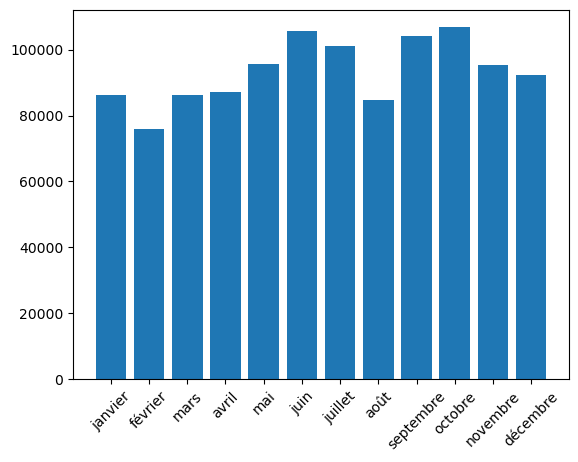

In [26]:
collisions_par_mois = carac.groupby('mois')['col'].count()

plt.bar(collisions_par_mois.index, collisions_par_mois.values)
noms_mois = ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'] 
plt.xticks(carac["mois"].unique(), noms_mois, rotation=45);

Année de l'accident

In [27]:
carac['annee'].dtype

dtype('int64')

In [236]:
# Conversion de la colonne "annee" au format "date" 
carac.annee = pd.to_datetime(carac.annee, format='%Y')
carac.annee.unique()

array(['2005-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [237]:
carac.annee = carac.annee.apply(lambda date: date.strftime('%Y'))
display(carac.annee.head())
display(carac.annee.tail())

0    2005
1    2005
2    2005
3    2005
4    2005
Name: annee, dtype: object

1121566    2021
1121567    2021
1121568    2021
1121569    2021
1121570    2021
Name: annee, dtype: object

In [30]:
carac['jour'].dtype

dtype('int64')

In [31]:
carac['jour'].unique()

array([12, 21,  4, 10, 28,  3, 18, 25, 29, 23, 11,  1, 30, 19,  9, 31, 15,
       13, 26,  2,  6,  8, 20, 16,  7,  5, 24, 14, 17, 22, 27])

In [238]:
# Conversion de la colonne "jour" au format "date" 
carac.jour = pd.to_datetime(carac.jour, format='%d')
carac.jour.unique()

array(['1900-01-12T00:00:00.000000000', '1900-01-21T00:00:00.000000000',
       '1900-01-04T00:00:00.000000000', '1900-01-10T00:00:00.000000000',
       '1900-01-28T00:00:00.000000000', '1900-01-03T00:00:00.000000000',
       '1900-01-18T00:00:00.000000000', '1900-01-25T00:00:00.000000000',
       '1900-01-29T00:00:00.000000000', '1900-01-23T00:00:00.000000000',
       '1900-01-11T00:00:00.000000000', '1900-01-01T00:00:00.000000000',
       '1900-01-30T00:00:00.000000000', '1900-01-19T00:00:00.000000000',
       '1900-01-09T00:00:00.000000000', '1900-01-31T00:00:00.000000000',
       '1900-01-15T00:00:00.000000000', '1900-01-13T00:00:00.000000000',
       '1900-01-26T00:00:00.000000000', '1900-01-02T00:00:00.000000000',
       '1900-01-06T00:00:00.000000000', '1900-01-08T00:00:00.000000000',
       '1900-01-20T00:00:00.000000000', '1900-01-16T00:00:00.000000000',
       '1900-01-07T00:00:00.000000000', '1900-01-05T00:00:00.000000000',
       '1900-01-24T00:00:00.000000000', '1900-01-14

In [239]:
carac.jour = carac.jour.apply(lambda date: date.strftime('%d'))
display(carac.jour.head())
display(carac.jour.tail())

0    12
1    21
2    21
3    04
4    10
Name: jour, dtype: object

1121566    01
1121567    01
1121568    01
1121569    01
1121570    02
Name: jour, dtype: object

In [34]:
# Calcul du nombre d'occurences de chaque modalité de la variable 'jour'
carac['jour'].value_counts().sort_index()

01    35235
02    36388
03    36848
04    37239
05    37243
06    38286
07    38041
08    37593
09    37783
10    38022
11    37147
12    38063
13    37184
14    37196
15    37417
16    37697
17    36928
18    37198
19    37241
20    36841
21    37149
22    36687
23    36595
24    35833
25    35118
26    35092
27    35533
28    36051
29    33864
30    33913
31    20146
Name: jour, dtype: int64

Intersection

In [35]:
carac['int'].dtype

dtype('int64')

In [36]:
carac['int'].unique()

array([ 1,  2,  9,  0,  6,  8,  3,  4,  7,  5, -1])

In [240]:
# Convert int from int to category
carac['int'] = carac['int'].astype('category')
# Write an assert statement confirming the change
assert carac['int'].dtype == 'category'

In [241]:
correspondances = { 1: 'Hors intersection', 2: 'Intersection en X', 3: 'Intersection en T', 
                   4: 'Intersection en Y', 5: 'Intersection à plus de 4 branches', 
                   6: 'Giratoire', 7: 'Place', 8: 'Passage à niveau', 9: 'Autre intersection'}

carac['int'] = carac['int'].replace(correspondances)

In [242]:
carac.int.replace(0, np.nan, inplace=True)

In [40]:
# Calcul nombre d'accidents selon le type d'intersection
counts = carac['int'].value_counts()
print(counts)

Hors intersection                    785408
Intersection en X                    136814
Intersection en T                    102684
Giratoire                             32910
Autre intersection                    24002
Intersection en Y                     17626
Intersection à plus de 4 branches     11115
Place                                  9517
Passage à niveau                       1387
-1                                        1
Name: int, dtype: int64


In [41]:
# Tri par type d'intersection
counts = counts.sort_index()
print(counts)

-1                                        1
Hors intersection                    785408
Intersection en X                    136814
Intersection en T                    102684
Intersection en Y                     17626
Intersection à plus de 4 branches     11115
Giratoire                             32910
Place                                  9517
Passage à niveau                       1387
Autre intersection                    24002
Name: int, dtype: int64


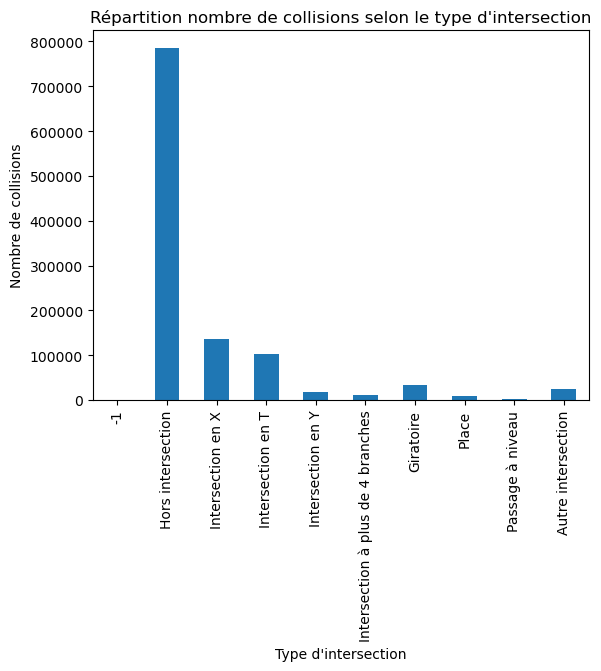

'1 – Hors intersection\n2 – Intersection en X\n3 – Intersection en T\n4 – Intersection en Y\n5 – Intersection à plus de 4 branches\n6 – Giratoire\n7 – Place\n8 – Passage à niveau\n9 – Autre intersection'

In [42]:
# Répartition du nombre de collisions selon le type d'intersection
counts.plot(kind='bar')

plt.title("Répartition nombre de collisions selon le type d'intersection")
plt.xlabel("Type d'intersection")
plt.ylabel("Nombre de collisions")
plt.show()

# Type d'intersection :
'''1 – Hors intersection
2 – Intersection en X
3 – Intersection en T
4 – Intersection en Y
5 – Intersection à plus de 4 branches
6 – Giratoire
7 – Place
8 – Passage à niveau
9 – Autre intersection'''

La lecture du graphique fait apparaitre une sur-représentation d'accident/collisions dans un contexte hors intersection.

In [43]:
# Statistiques descriptives sur la variable cible ('int') du fichier carac
print(carac['int'].describe())

count               1121464
unique                   10
top       Hors intersection
freq                 785408
Name: int, dtype: object


Lumière : conditions d’éclairage dans lesquelles l'accident s'est produit

In [44]:
carac['lum'].dtype

dtype('int64')

In [243]:
carac.lum = carac.lum.astype('category') 
assert carac.lum.dtype == 'category'

In [46]:
carac.lum.unique()

[3, 1, 5, 4, 2, -1]
Categories (6, int64): [-1, 1, 2, 3, 4, 5]

In [244]:
carac['lum'].value_counts(normalize=True)*100

1     68.325946
5     16.524054
3      8.262339
2      6.048213
4      0.839002
-1     0.000446
Name: lum, dtype: float64

In [245]:
carac.lum.replace(-1, np.nan, inplace=True)

In [246]:
correspondances = { 1: 'Plein jour', 2: 'Crépuscule ou aube', 3: 'Nuit sans éclairage public', 
                   4: 'Nuit avec éclairage public non allumé', 5: 'Nuit avec éclairage public allumé'}

carac['lum'] = carac['lum'].replace(correspondances)

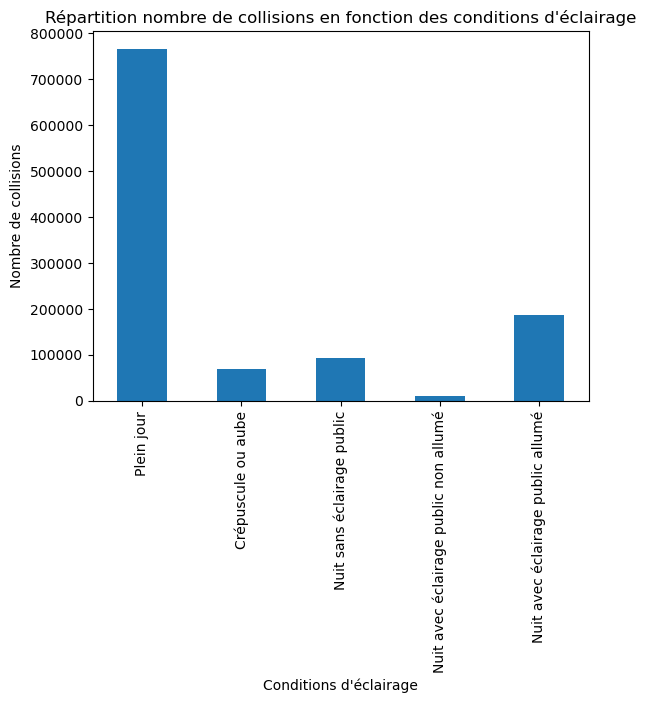

In [50]:
# Calcul du nombre de collisions en fonction des conditions d'éclairage
counts = carac['lum'].value_counts()

# Tri selon les conditions d'éclairage
counts = counts.sort_index()

# Répartition du nombre de collisions en fonction des conditions d'éclairage
counts.plot(kind='bar')

plt.title("Répartition nombre de collisions en fonction des conditions d'éclairage")
plt.xlabel("Conditions d'éclairage")
plt.ylabel("Nombre de collisions")

plt.show()

In [ ]:
# la lecture du graphique montre que les collisions se produisent en forte majorité en plein jour ou durant la nuit
# avec un éclairage public. A savoir dans des contextes où la luminosité est bonne voire très bonne (en plein jour).

In [51]:
# Statistiques descriptives sur la variable explicative ('lum')
print(carac['lum'].describe())

count        1121566
unique             5
top       Plein jour
freq          766324
Name: lum, dtype: object


Conditions atmosphériques

In [52]:
carac['atm'].dtype

dtype('float64')

In [247]:
carac.atm = carac.atm.astype('category') 
assert carac.atm.dtype == 'category'

In [248]:
carac.atm.cat.categories

Float64Index([-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype='float64')

In [56]:
carac['atm'].value_counts()

1.0     904432
2.0     118155
8.0      37608
3.0      24289
7.0      12673
9.0       7763
5.0       7396
4.0       6351
6.0       2810
-1.0        21
Name: atm, dtype: int64

In [57]:
# Statistiques descriptives sur la variable explicative ('atm')
print(carac['atm'].describe())

count     1121498.0
unique         10.0
top             1.0
freq       904432.0
Name: atm, dtype: float64


In [249]:
correspondances = { -1: 'Non renseigné', 1: 'Normale', 2: 'Pluie légère', 3: 'Pluie forte', 4: 'Neige - grêle', 
                   5: 'Brouillard - fumée', 6: 'Vent fort - tempête', 7: 'Temps éblouissant', 8: 'Temps couvert', 
                   9: 'Autre'}

carac['atm'] = carac['atm'].replace(correspondances)

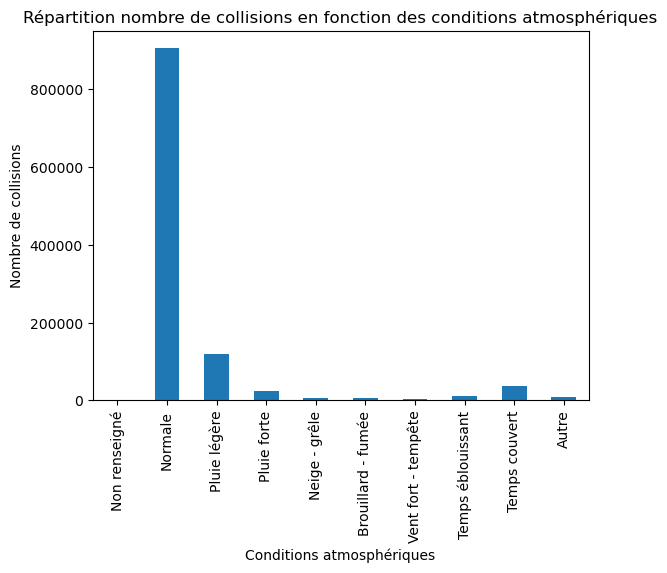

In [59]:
# Calcul du nombre de collisions en fonction des conditions atmosphériques
counts = carac['atm'].value_counts()

# Tri selon les conditions atmosphériques
counts = counts.sort_index()

# Répartition nombre de collisions en fonction des conditions atmosphériques
counts.plot(kind='bar')

plt.title("Répartition nombre de collisions en fonction des conditions atmosphériques")
plt.xlabel("Conditions atmosphériques")
plt.ylabel("Nombre de collisions")

plt.show()

In [ ]:
# la lecture du graphique est inatendue puisque l'on peut observer que la majorité des collisions se produit
# dans des conditions climatiques normales, sans intempréries ou tout autre perturbation atmosphérique.
# On constate toutefois qu'une pluie légère est la deuxième cause de collision.

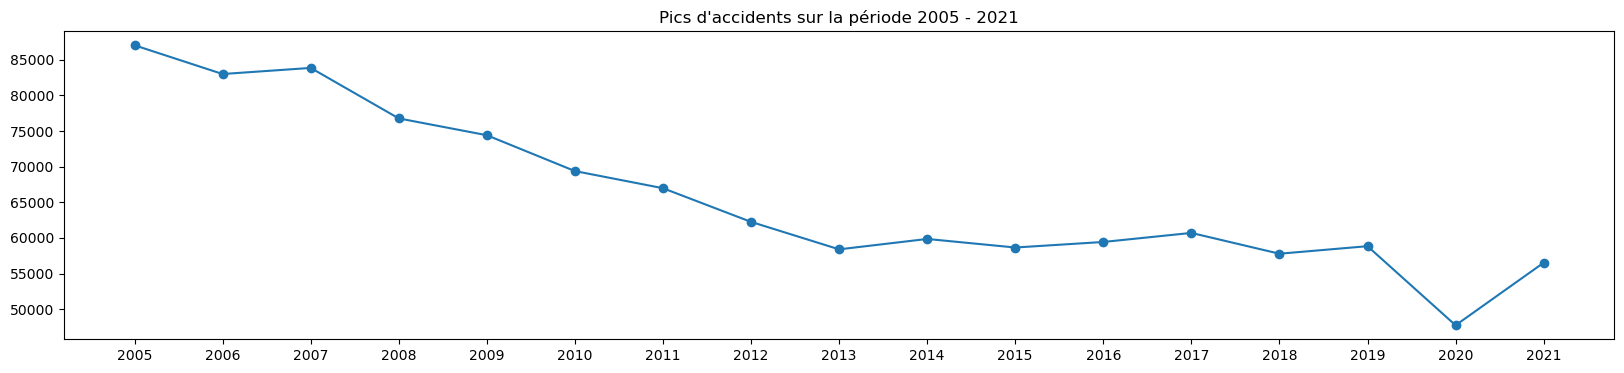

In [60]:
# Visualisation des tendances de pics d'accidents entre 2005 et fin 2021

#carac['date'] = carac['jour'].astype(str) + '-' + carac['mois'].astype(str) + '-' + carac['annee'].astype(str)
#carac['date'] = pd.to_datetime(carac['date'])

values = carac['annee'].value_counts().sort_index()

plt.figure(figsize=(20, 4))
plt.plot_date(values.index, values, linestyle='-')
plt.title("Pics d'accidents sur la période 2005 - 2021");

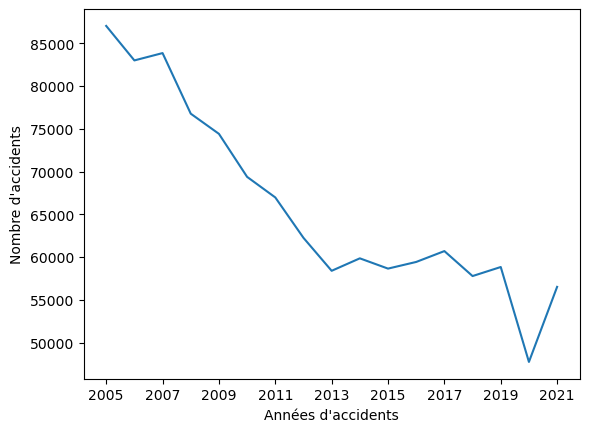

In [61]:
carac.groupby('annee')['num_acc'].count().plot(kind='line', xlabel="Années d'accidents", ylabel="Nombre d'accidents");

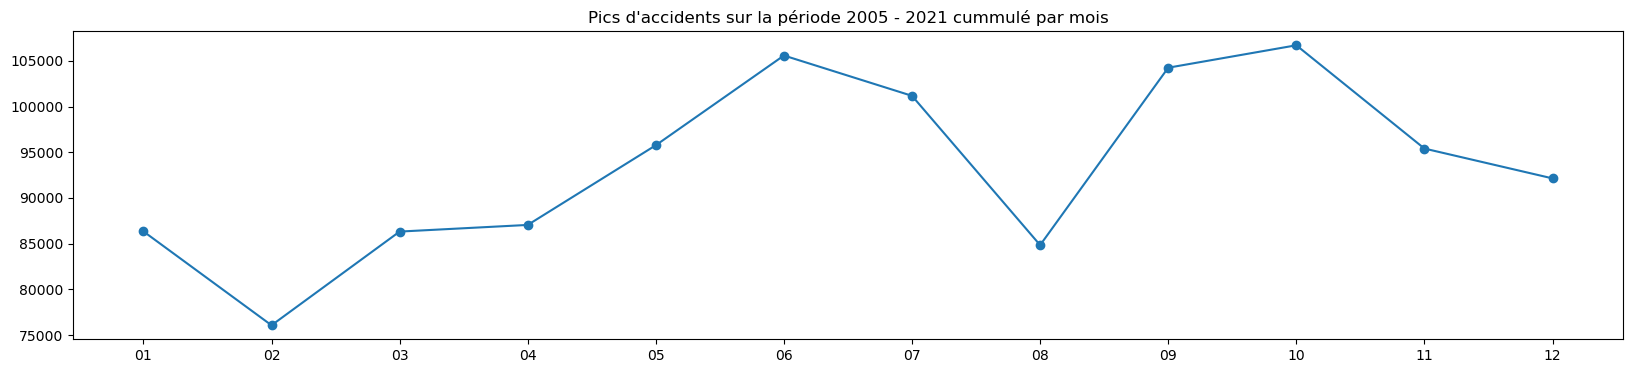

In [62]:
values = carac['mois'].value_counts().sort_index()

plt.figure(figsize=(20, 4))
plt.plot_date(values.index, values, linestyle='-')
plt.title("Pics d'accidents sur la période 2005 - 2021 cummulé par mois");

In [63]:
caracbyYearMonth = carac.sort_values(["annee", "mois"])

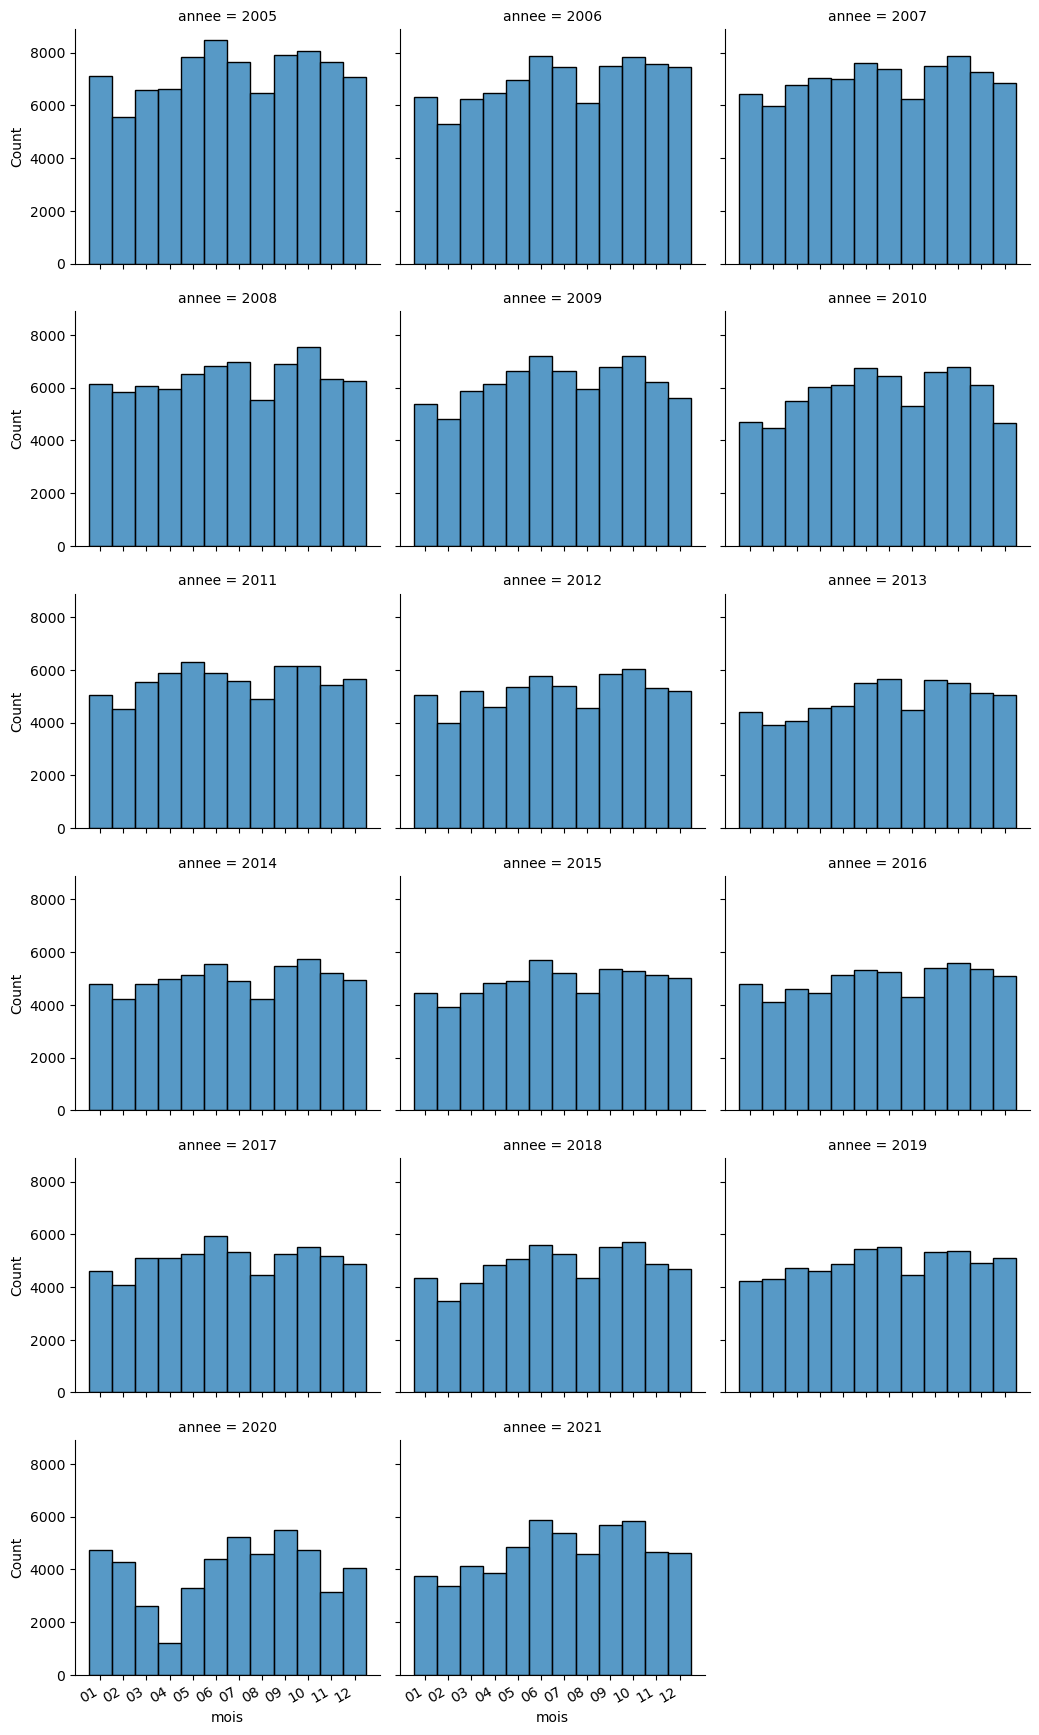

In [64]:
g = sns.FacetGrid(caracbyYearMonth, col="annee", height=3.5, col_wrap=3)#, color ='orange'
g.map_dataframe(sns.histplot, "mois")
plt.gcf().autofmt_xdate() 
# Nombre d'accidents d'un mois donné sur une année donnée entre 2005 et 2021

In [65]:
caracOct = carac[carac["mois"] == "10"]
caracOct.mois.unique()

array(['10'], dtype=object)

In [66]:
caracOct.groupby("annee")["num_acc"].count()

annee
2005    8057
2006    7817
2007    7873
2008    7524
2009    7180
2010    6777
2011    6162
2012    6049
2013    5506
2014    5745
2015    5273
2016    5596
2017    5524
2018    5698
2019    5376
2020    4713
2021    5832
Name: num_acc, dtype: int64

In [67]:
nombreAccOct = sum(caracOct.groupby("annee")["num_acc"].count())
nombreAccOct

106702

In [68]:
caracOct.groupby(["annee", "mois"])["num_acc"].count() * 100 / nombreAccOct

annee  mois
2005   10      7.550936
2006   10      7.326011
2007   10      7.378493
2008   10      7.051414
2009   10      6.729021
2010   10      6.351334
2011   10      5.774962
2012   10      5.669060
2013   10      5.160166
2014   10      5.384154
2015   10      4.941801
2016   10      5.244513
2017   10      5.177035
2018   10      5.340106
2019   10      5.038331
2020   10      4.416974
2021   10      5.465689
Name: num_acc, dtype: float64

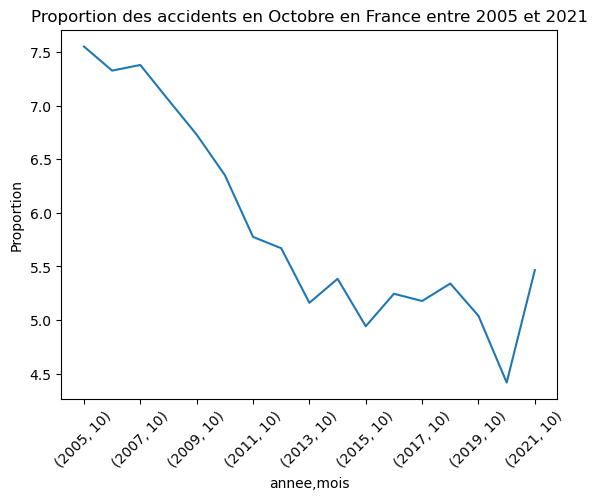

In [69]:
(caracOct.groupby(["annee", "mois"])["num_acc"].count() * 100 / nombreAccOct).plot(x="annee", y="num_acc", kind="line", rot=45, ylabel="Proportion", title="Proportion des accidents en Octobre en France entre 2005 et 2021");

In [70]:
caracJuin = carac[carac["mois"] == "06"]
caracJuin.mois.unique()

array(['06'], dtype=object)

In [71]:
nombreAccJuin = sum(caracJuin.groupby("annee")["num_acc"].count())
nombreAccJuin

105582

In [72]:
caracJuin.groupby(["annee", "mois"])["num_acc"].count() * 100 / nombreAccJuin

annee  mois
2005   06      8.021254
2006   06      7.459605
2007   06      7.188725
2008   06      6.449016
2009   06      6.803243
2010   06      6.368510
2011   06      5.565343
2012   06      5.442216
2013   06      5.225322
2014   06      5.256578
2015   06      5.402436
2016   06      5.046315
2017   06      5.621223
2018   06      5.284045
2019   06      5.154288
2020   06      4.156959
2021   06      5.554924
Name: num_acc, dtype: float64

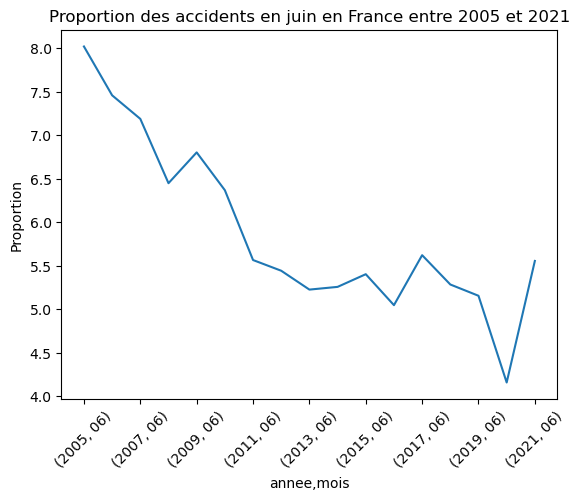

In [73]:
(caracJuin.groupby(["annee", "mois"])["num_acc"].count() * 100 / nombreAccJuin).plot(x="annee", y="num_acc", kind="line", rot=45, ylabel="Proportion", title="Proportion des accidents en juin en France entre 2005 et 2021");

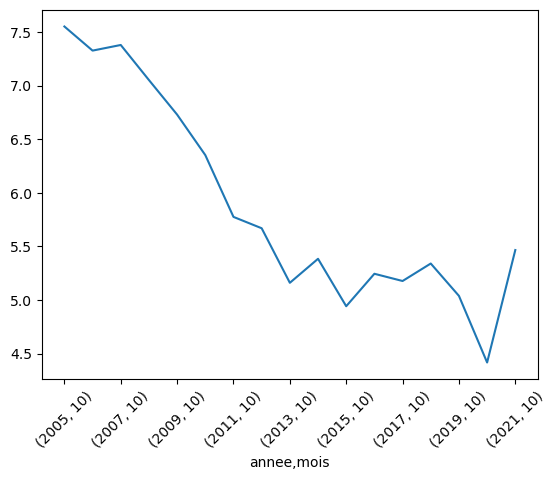

In [74]:
(caracOct.groupby(["annee", "mois"])["num_acc"].count() * 100 / nombreAccOct).plot(x="annee", y="num_acc", kind="line", rot=45);

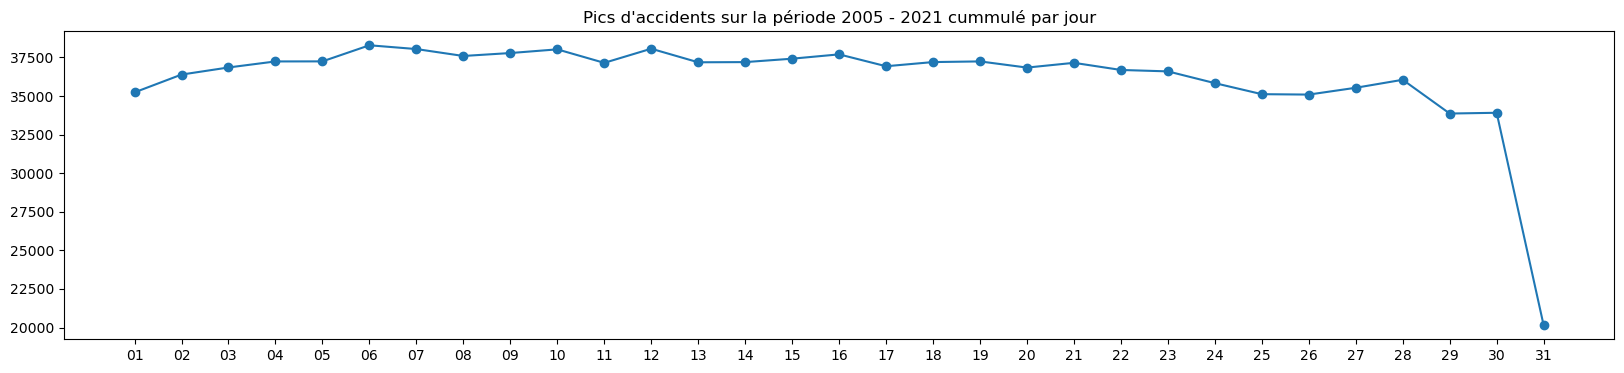

In [75]:
values = carac['jour'].value_counts().sort_index()

plt.figure(figsize=(20, 4))
plt.plot_date(values.index, values, linestyle='-')
plt.title("Pics d'accidents sur la période 2005 - 2021 cummulé par jour");

In [76]:
#carac['date'] = carac['jour'].astype(str) + '-' + carac['mois'].astype(str) + '-' + carac['annee'].astype(str) 

In [250]:
# Combine into a single datetime Series
carac['date'] = pd.to_datetime(carac['annee'].astype(str) + '-' + carac['mois'].astype(str) + '-' + carac['jour'].astype(str))

In [251]:
carac['date'][0]

Timestamp('2005-01-12 00:00:00')

In [252]:
carac['date'] = carac.date.apply(lambda date: date.strftime('%Y-%m-%d'))

carac['date'][0]

'2005-01-12'

In [80]:
carac['date'].dtype

dtype('O')

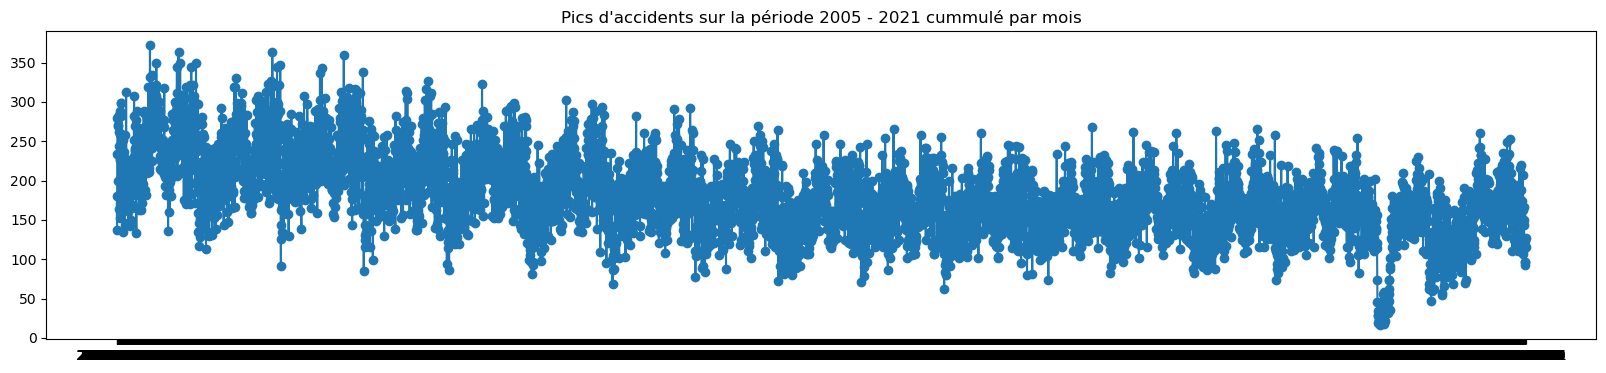

In [81]:
values = carac['date'].value_counts().sort_index()

plt.figure(figsize=(20, 4))
plt.plot_date(values.index, values, linestyle='-')
plt.title("Pics d'accidents sur la période 2005 - 2021 cummulé par mois");

In [ ]:
### Avec le graphe précédent, on constate une décroissance des pics d'accidents entre 2002 et fin 2021 qui peut s'expliquer
### par l'hypothèse suivante :

# l'intensification de la répression de la délinquance routière, et notamment des excès de vitesse, avec l'augmentation
# des radars durant le mandat de président de Nicolas Sarkozy entre 2007 et 2012 mais également entre 2005 et 2007
# lorsqu'il était ministre de l'intérieur.

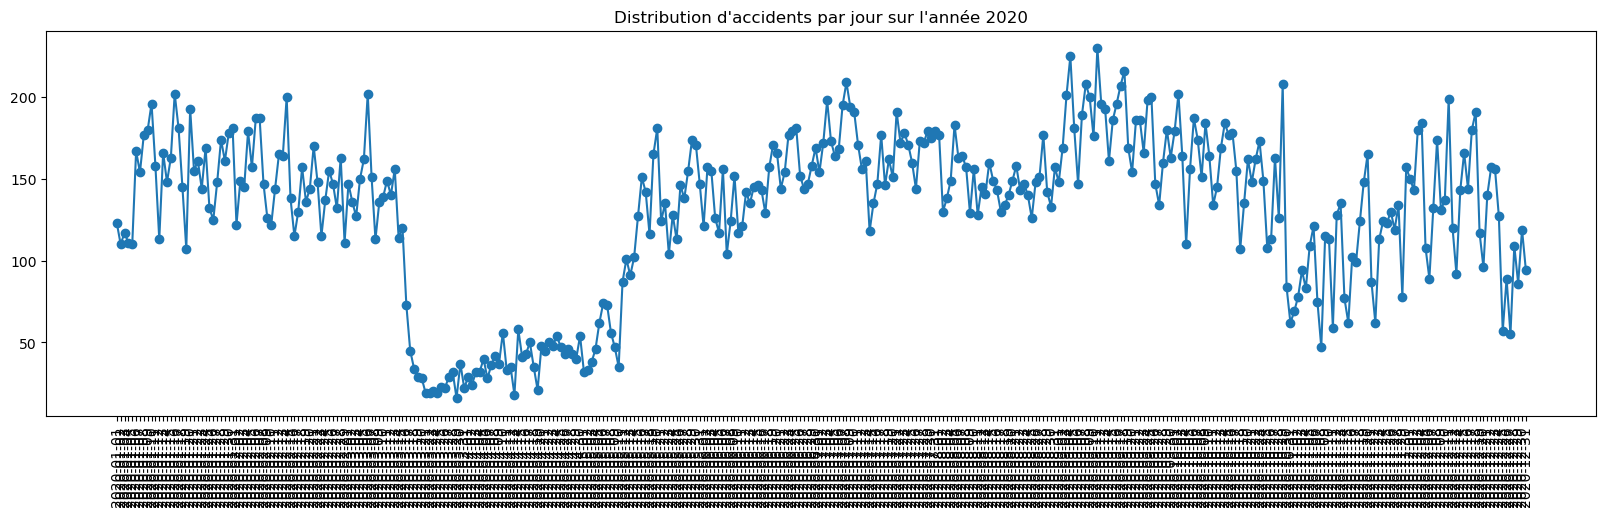

In [82]:
values = carac[carac['annee'] == '2020']['date'].value_counts().sort_index()

plt.figure(figsize=(20, 5))
plt.plot_date(values.index, values, linestyle='-')
plt.xticks(rotation='vertical');
plt.title("Distribution d'accidents par jour sur l'année 2020");

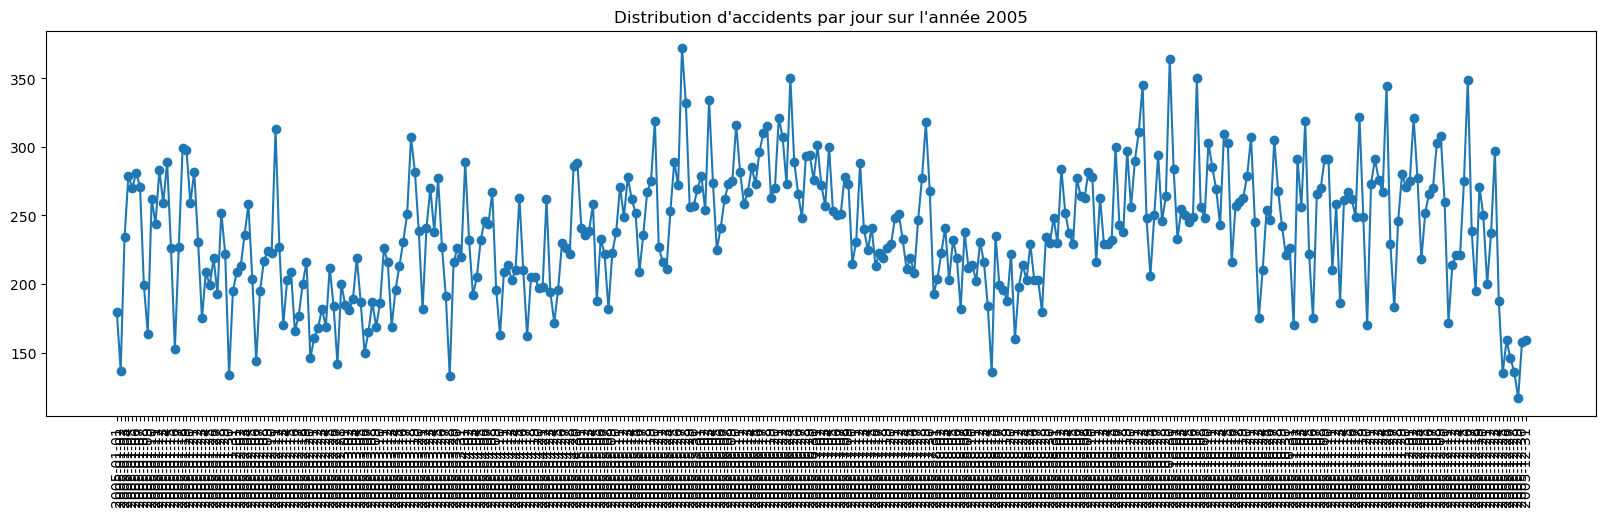

In [199]:
values = carac[carac['annee'] == '2005']['date'].value_counts().sort_index()

plt.figure(figsize=(20, 5))
plt.plot_date(values.index, values, linestyle='-')
plt.xticks(rotation='vertical');
plt.title("Distribution d'accidents par jour sur l'année 2005");

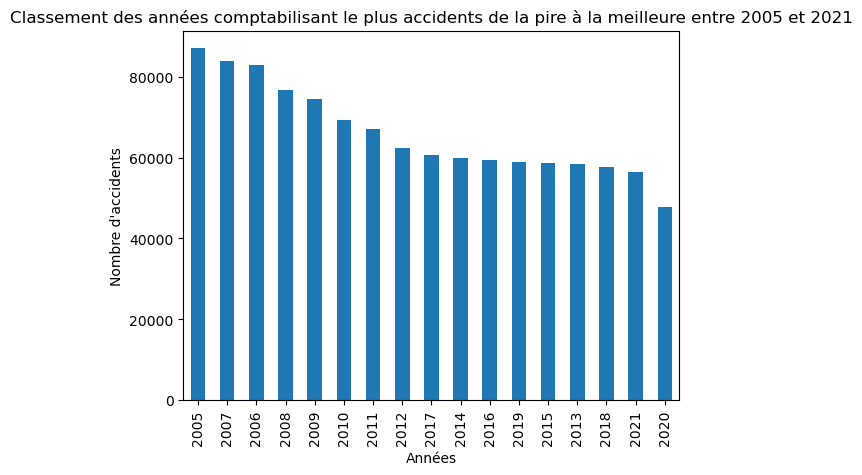

In [83]:
# Classement des années comptabilisant le plus d'accidents (de la pire à la meilleure entre 2005 et 2021)
counts_2 = carac['annee'].value_counts()

# Nombre d'accidents sous forme de graphe
counts_2.plot(kind='bar')

plt.title("Classement des années comptabilisant le plus accidents de la pire à la meilleure entre 2005 et 2021")
plt.xlabel("Années")
plt.ylabel("Nombre d'accidents")
plt.show()

In [ ]:
# l'année comptabilisant le moins d'accidents est l'année 2020 qui a été fortement impacté par les périodes de confinement
# en raison du Covid.

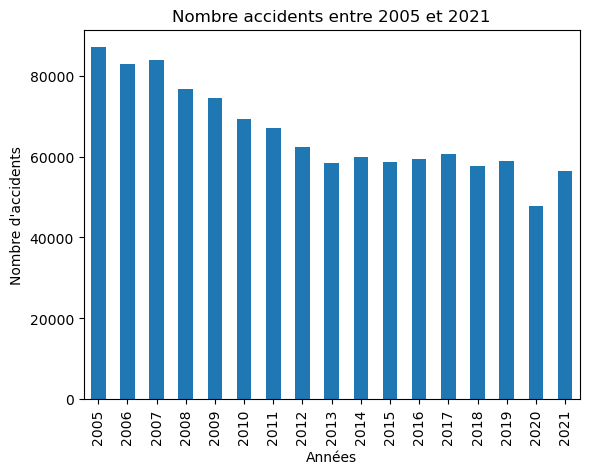

In [84]:
# Le nombre d'accidents entre 2005 et 2021
counts_2 = carac['annee'].value_counts()

# Tri selon les années chronologiques (entre 2005 à 2021)
counts_2 = counts_2.sort_index()

# Nombre d'accidents sous forme de graphe
counts_2.plot(kind='bar')
plt.title("Nombre accidents entre 2005 et 2021")
plt.xlabel("Années")
plt.ylabel("Nombre d'accidents")
plt.show()


In [ ]:
# Cela confirme la tendance générale constatée sur le graphe précédent avec une décroissance du nombre d'accidents
# entre 2005 et fin 2013. A une exception près, l'année 2012 a enregistrée un pic par rapport aux années précédentes,
# ce qui n'était pas visible sur le graphe précédent.

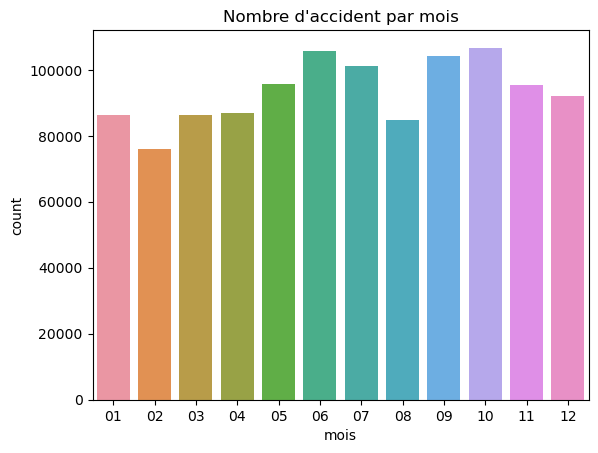

In [85]:
# Visualisation des mois qui sont plus propices aux accidents que d'autres.

# le nombre d'accidents par mois
sns.countplot(x=carac['mois'])
plt.title("Nombre d'accident par mois");

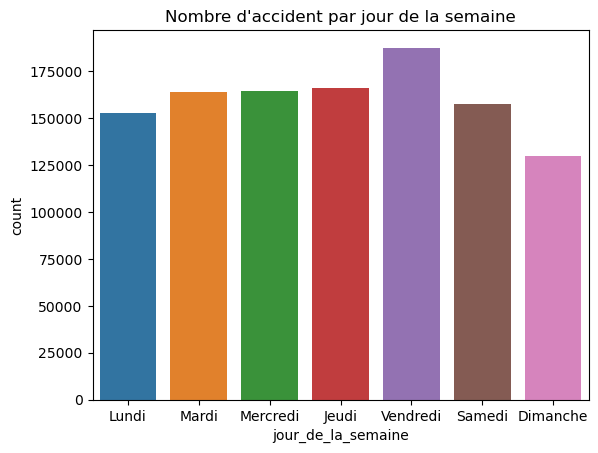

In [253]:
# Visualisation du nombre d'accidents en fonction des jours de la semaine

carac['jour_de_la_semaine'] = carac['date'].astype('datetime64').dt.weekday

sns.countplot(x=carac['jour_de_la_semaine'])
plt.xticks(np.arange(7), ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.title("Nombre d'accident par jour de la semaine");

In [ ]:
# On constate qu'il y a plus d'accidents le vendredi, veille de weekend, et moins d'accidents le Dimanche.
# Sachant que la variable hrmn contient l'heure et les minutes de chaque accident, on peut encore affiner notre analyse
# avec le nombre d'accident réparti selon l'heure de la journée.

Heure et minutes de l'accident

In [86]:
carac.columns

Index(['Unnamed: 0', 'num_acc', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int',
       'atm', 'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep', 'annee',
       'date'],
      dtype='object')

In [87]:
carac['hrmn'].dtype

dtype('O')

In [88]:
carac['hrmn'][0]

1900

In [89]:
carac['hrmn'].unique()

array([1900, 1600, 1845, ..., '05:09', '03:54', '04:54'], dtype=object)

In [90]:
dt.datetime.fromtimestamp(carac['hrmn'][0])

datetime.datetime(1970, 1, 1, 1, 31, 40)

In [91]:
carac['hrmn'][carac['hrmn'].str.isdecimal() == False]

958469     01:30
958470     02:50
958471     15:15
958472     20:20
958473     04:00
           ...  
1121566    06:10
1121567    10:20
1121568    18:00
1121569    10:55
1121570    18:00
Name: hrmn, Length: 163102, dtype: object

In [92]:
len(carac['hrmn'][carac['hrmn'].str.isdecimal() == False])

163102

In [105]:
len(carac['hrmn'][carac['hrmn'].str.isdecimal() != False])

958469

In [ ]:
# Il s'avère que toutes les valeurs de la colonne 'hrmn' ne sont pas au format hrmn.
# Une quantité de valeurs non négligeable est au format hr:mn

In [93]:
# Test code
my_string = '15:30'

In [94]:
# Test code
my_string.partition(':')

('15', ':', '30')

In [95]:
# Test code
x, y, z = my_string.partition(':')

In [97]:
# Test code
x+z

'1530'

In [98]:
# Test code
h = x+z

In [99]:
# Test code
int(h)

1530

In [100]:
# Création d'une fonction permettant d'avoir toutes les valeurs hrmn au bon format
def get_hrmn(x):
    if x.isdecimal():
        return x
    hr, sep, mn = x.partition(':')
    return hr+mn

In [101]:
# Test code
get_hrmn(my_string)

'1530'

In [104]:
# Application de la fonction get_hrmn à la colonne 'hrmn'
(carac['hrmn'][carac['hrmn'].str.isdecimal() == False]).apply(get_hrmn)
#['hrmn'].apply(get_hrmn)

958469     0130
958470     0250
958471     1515
958472     2020
958473     0400
           ... 
1121566    0610
1121567    1020
1121568    1800
1121569    1055
1121570    1800
Name: hrmn, Length: 163102, dtype: object

In [106]:
carac_hrmn = (carac['hrmn'][carac['hrmn'].str.isdecimal() == False]).apply(get_hrmn) # Series pour les tests

In [120]:
carac['hrmn'].dtype

dtype('O')

In [123]:
carac.hrmn.astype('str').str[:2]

0          19
1          16
2          18
3          16
4          19
           ..
1121566    06
1121567    10
1121568    18
1121569    10
1121570    18
Name: hrmn, Length: 1121571, dtype: object

In [124]:
carac.hrmn.astype('str').str[2:]

0           00
1           00
2           45
3           15
4           45
          ... 
1121566    :10
1121567    :20
1121568    :00
1121569    :55
1121570    :00
Name: hrmn, Length: 1121571, dtype: object

In [127]:
(carac.hrmn.astype('str').str[-1]).unique()

array(['0', '5', '1', '4', '8', '6', '9', '2', '7', '3'], dtype=object)

In [129]:
carac['hrmn'][0]

1900

In [138]:
carac['hrmn'].astype('str')[0]

'1900'

In [139]:
len(carac['hrmn'].astype('str')[0])

4

In [143]:
carac.hrmn.astype('str').apply(lambda hrmn : len(hrmn[0]))

0          1
1          1
2          1
3          1
4          1
          ..
1121566    1
1121567    1
1121568    1
1121569    1
1121570    1
Name: hrmn, Length: 1121571, dtype: int64

In [147]:
longueur=carac.hrmn.astype('str').apply(lambda hrmn : len(hrmn))

In [148]:
longueur.min()

1

In [149]:
longueur.max()

5

In [150]:
longueur.unique()

array([4, 3, 2, 1, 5])

In [151]:
longueur.describe()

count    1.121571e+06
mean     3.915811e+00
std      6.399467e-01
min      1.000000e+00
25%      4.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: hrmn, dtype: float64

In [278]:
longueur.value_counts(dropna=False, normalize=True)*100

4    64.268869
3    19.723406
5    14.542280
2     1.158553
1     0.306891
Name: hrmn, dtype: float64

In [ ]:
#carac['heure'] = carac.hrmn.astype('str').str[:2]

In [ ]:
#carac['minute'] = carac.hrmn.astype('str').str[2:]

In [117]:
carac['hrmn'][0]

1900

In [ ]:
# Splitter avant de convrtir ?

In [ ]:
carac_hrmn.astype('int')

0          1900
1          1600
2          1845
3          1615
4          1945
           ... 
1121566     610
1121567    1020
1121568    1800
1121569    1055
1121570    1800
Name: hrmn, Length: 1121571, dtype: int32

In [ ]:
carac['heure'] = carac_hrmn.astype('int')//100

In [ ]:
print(carac['heure'])

0          19
1          16
2          18
3          16
4          19
           ..
1121566     6
1121567    10
1121568    18
1121569    10
1121570    18
Name: heure, Length: 1121571, dtype: int32


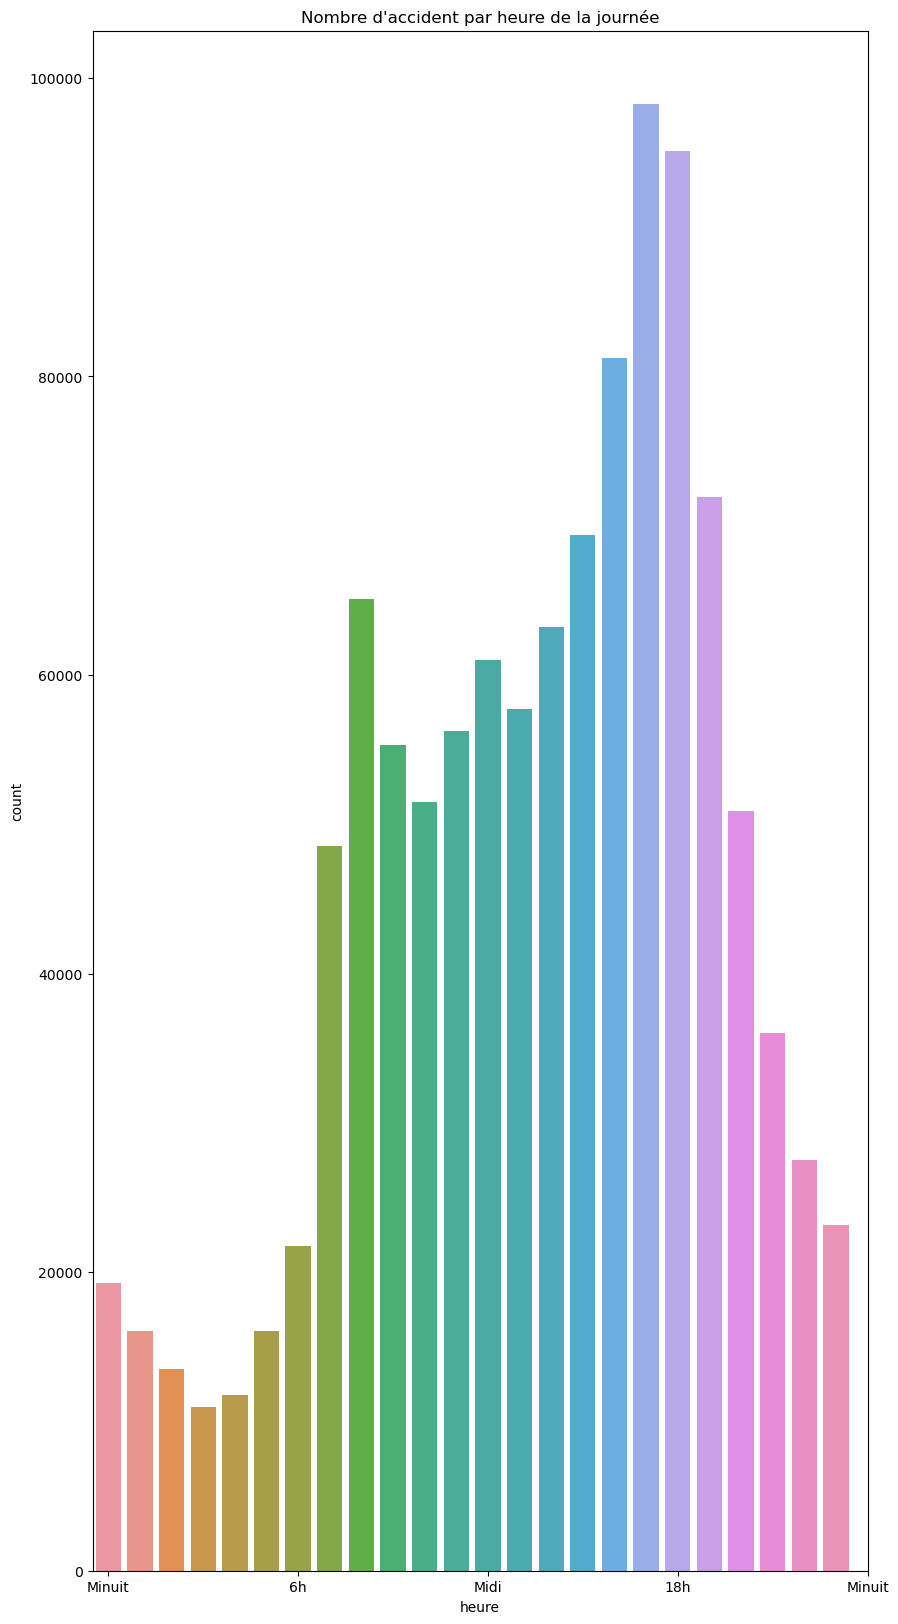

In [ ]:
# Visualisation du nombre de collisions par heure de la journée
plt.figure(figsize=(10, 20))
sns.countplot(x=carac['heure'])
plt.xticks([0, 6, 12, 18, 24], ['Minuit', '6h', 'Midi', '18h', 'Minuit'])
plt.title("Nombre de collisions par heure de la journée")
plt.show();

In [ ]:
# Il y a un pic d'accident entre 16h et 19h : c'est logique puisque ce sont les heures où la circulation est la plus dense.
# Cela correspond à la sortie des bureaux en semaine.

dep
Département : Code INSEE (Institut National de la Statistique et des Etudes Economiques) du
département (2A Corse-du-Sud – 2B Haute-Corse).

In [154]:
carac.dep.dtype

dtype('O')

In [155]:
carac['dep'][0]

590

In [156]:
carac.dep.describe()

count     1121571
unique        220
top           750
freq        93460
Name: dep, dtype: int64

In [157]:
# Group the carac dataset by "Dep" 
dep = carac.groupby(by=['dep'])['num_acc'].count()
dep.head()

dep
10    6237
20    4339
30    3921
40    2162
50    1964
Name: num_acc, dtype: int64

In [160]:
type(dep)

pandas.core.series.Series

In [164]:
dep = dep.reset_index()
dep.head()

,dep,num_acc
0,10,6237
1,20,4339
2,30,3921
3,40,2162
4,50,1964


In [165]:
# Print out how many rows 
dep.shape

(220, 2)

In [166]:
dep.sort_values(by=['num_acc']).head()

,dep,num_acc
213,975,12
217,986,32
195,830,34
215,977,51
190,8,91


In [167]:
dep.sort_values(by=['num_acc']).tail()

,dep,num_acc
94,940,34658
92,920,36409
93,930,39476
12,130,58857
75,750,93460


In [168]:
carac['dep'].value_counts().head(10)

750    93460
130    58857
930    39476
920    36409
940    34658
60     30954
690    30331
590    25899
330    24640
910    20443
Name: dep, dtype: int64

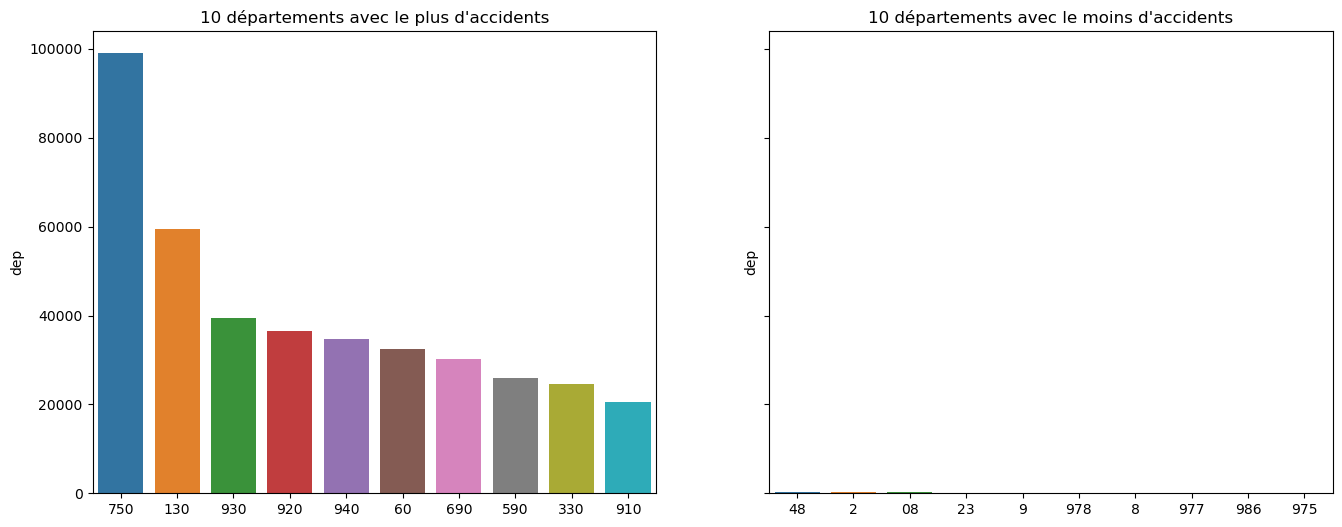

In [ ]:
# Lieu des accidents : affichons les 10 départements avec le plus d'accidents,
# et les 10 départements avec le moins d'accidents

max_col = carac['dep'].value_counts().head(10)
min_col = carac['dep'].value_counts().tail(10)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6), sharey=True)

sns.barplot(x=max_col.index, y=max_col, order=max_col.index, ax=ax1)
# max_col.plot.bar(ax=ax1)
ax1.title.set_text("10 départements avec le plus d'accidents")

sns.barplot(x=min_col.index, y=min_col, order=min_col.index, ax=ax2)
# min_col.plot.bar(ax=ax2)
ax2.title.set_text("10 départements avec le moins d'accidents");

In [ ]:
# En tête des départements, nous trouvons sans réelle surprise : Paris(75), Marseille (13) et la Seine Saint Denis (93)
## Les 3 départements où il y a le moins de collisions : 975 (Saint-Pierre-et-Miquelon), 986 (Wallis-et-Futuna)
## et 977 (Saint-Barthélemy)

### La majorité des départements avec le plus d'accidents font partie des départements les plus peuplés de France.
### La réciproque est aussi vraie pour les départements les moins peuplés.

In [ ]:
### Suggestions : afin de compléter la partie DataViz, nous pourrions mettre à profit la fusion des DataFrames
#'usagers' et 'carac' pour visualiser une carte de France avec les coordonnées gps identifiant les lieux de chaque collision en fonction
# en fonction du niveau de gravité des accidents, et en attribuant une couleur spécifique pour les blessés légers,
# les blessés graves et les personnes décédés suite à leurs blessures. Un graphe supplémentaire permettrait de visualiser
# l'influence des conditions atmosphériques et du type de collision sur la gravité des accidents.


'agg'
Localisation :
1 – Hors agglomération
2 – En agglomération

In [172]:
carac['agg'].dtype

dtype('int64')

In [173]:
carac['agg'].unique()

array([2, 1])

In [254]:
carac['agg'] = carac['agg'].astype('category') 
assert carac['agg'].dtype == 'category'

In [255]:
carac['agg'].value_counts(dropna=False, normalize=True).round(4)*100

2    67.48
1    32.52
Name: agg, dtype: float64

In [256]:
correspondances = { 1: 'Hors agglomération', 2: 'En agglomération'}

carac['agg'] = carac['agg'].replace(correspondances)

In [257]:
carac['agg'].cat.categories

Index(['Hors agglomération', 'En agglomération'], dtype='object')

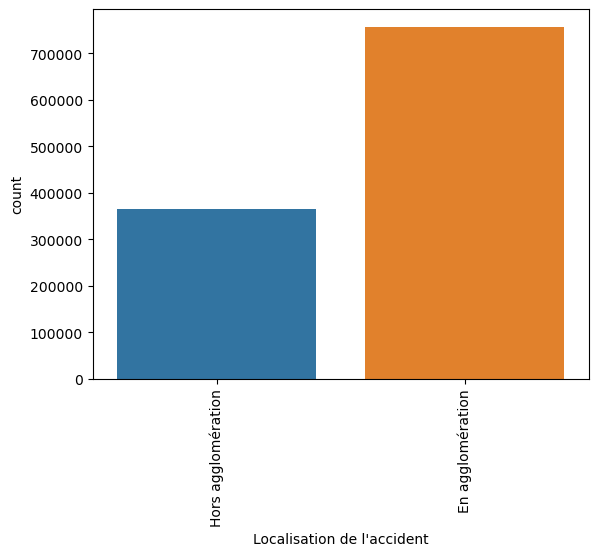

In [192]:
sns.countplot(x=carac['agg'])
plt.xticks(rotation='vertical')
plt.xlabel("Localisation de l'accident")
# Show plot
plt.show()

'com'
Commune : Le numéro de commune est un code donné par l‘INSEE. Le code est composé du code
INSEE du département suivi par 3 chiffres.

In [181]:
carac['com'].dtype

dtype('O')

In [182]:
carac['com'].head()

0     11
1     51
2     51
3     82
4    478
Name: com, dtype: object

In [258]:
nbCharCom=carac['com'].astype('str').apply(lambda com : len(com))
nbCharCom.unique()

array([2, 3, 1, 5])

In [259]:
len(nbCharCom)

1121571

In [260]:
carac['com'].describe()

count     1121569
unique      19898
top            55
freq        37562
Name: com, dtype: object

In [261]:
nbCharCom.value_counts(dropna=False)

3    582236
2    323559
5    163102
1     52674
Name: com, dtype: int64

##### Quells valeurs sont cohérentes d'après la définition du champ ?

'adr'
Adresse postale : variable renseignée pour les accidents survenus en agglomération.

In [189]:
carac['adr'].dtype

dtype('O')

In [191]:
carac[carac['agg'] == 'En agglomération']['adr'].head()

0                CD41B
1         rue de Lille
7     le hameau du lac
11        Rue de Lille
13                 NaN
Name: adr, dtype: object

In [193]:
carac[carac['agg'] == 'En agglomération']['adr'].value_counts(dropna=False, normalize=True)

NaN                         0.006985
BOULEVARD PERIPHERIQUE      0.000994
BOULEVARD PERIPHERIQUE I    0.000797
BOULEVARD PERIPHERIQUE E    0.000677
PLACE DE LA CONCORDE        0.000593
                              ...   
105, BEAUCAIRE (ROUTE)      0.000001
RN580, ROUTE D'AVIGNON      0.000001
ROGER PASCAL                0.000001
boulevard Charles Gide      0.000001
2 avenue de BÃ©ziers        0.000001
Name: adr, Length: 396848, dtype: float64

'gps'
originellement connu sous le nom de Navstar GPS, est un système de positionnement par satellites appartenant au gouvernement fédéral des États-Unis.

In [194]:
carac['gps'].dtype

dtype('O')

In [195]:
carac['gps'].head()

0    M
1    M
2    M
3    M
4    M
Name: gps, dtype: object

In [196]:
carac['gps'].describe()

count     643154
unique        10
top            M
freq      625741
Name: gps, dtype: object

In [197]:
carac['gps'].unique()

array(['M', nan, '0', 'A', 'G', 'R', 'S', 'C', 'P', 'T', 'Y'],
      dtype=object)

M : Latitude (en degrés décimaux)
A : Longitude (en degrés décimaux)
G : Altitude (en mètres)
R : Vitesse (en mètres par seconde)
S : Cap (en degrés)
P : Précision horizontale (en mètres)
Y : Précision verticale (en mètres)

##### A quoi correspondent les différentes valeurs de GPS ?

'lat'
Latitude

In [198]:
carac['lat'].dtype

dtype('O')

In [ ]:
#carac['lat'][carac['lat'].str.isdecimal() == False].apply()

In [262]:
# Check if the value is not decimal then do the subsetting. – # Replace ',' with '.'
# numpy.where(condition, [x, y, ]/) Where True, yield x, otherwise yield y.
np.where(carac['lat'].str.isdecimal() == False, carac['lat'].str.replace(",", "."), carac['lat']) 

array(['5051500', '5053700', '5054600', ..., '44.9112100000',
       '44.9542747363', '48.7966700000'], dtype=object)

In [265]:
# Do replacement of ',' with '.'
carac['lat'] = np.where(carac['lat'].str.isdecimal() == False, carac['lat'].str.replace(",", "."), carac['lat']) 

In [266]:
# Convert the object Series to float
carac['lat'] = carac['lat'].astype('float')

In [267]:
carac['lat'].head()

0    5051500.0
1    5053700.0
2    5054600.0
3    5098700.0
4    5096400.0
Name: lat, dtype: float64

In [268]:
carac['lat'].tail()

1121566    44.526619
1121567    45.380291
1121568    44.911210
1121569    44.954275
1121570    48.796670
Name: lat, dtype: float64

##### Valeurs de latitude vont de -90° à 90° 
que fait-on

'long', 
Longitude

In [212]:
carac['long'].dtype

dtype('O')

In [269]:
carac['long'].head()

0    294400
1    280200
2    280000
3    240800
4    247500
Name: long, dtype: object

In [270]:
carac['long'].unique()

array(['294400', '280200', '280000', ..., '5,0196360000',
       ' -0,5179211363', '2,0505000000'], dtype=object)

In [271]:
# Returns a trimmed version 
carac['long'] = carac['long'].str.strip()

In [272]:
# Replace '-' with NaN
carac['long'] = carac['long'].replace('-', np.nan)

In [273]:
# Check if the value is not decimal then do the subsetting. – # Replace ',' with '.'
np.where(carac['long'].str.isdecimal() == False, carac['long'].str.replace(",", "."), carac['long']) 

array(['294400', '280200', '280000', ..., '5.0196360000', '-0.5179211363',
       '2.0505000000'], dtype=object)

In [274]:
# Replace ',' with '.'
carac['long'] = np.where(carac['long'].str.isdecimal() == False, carac['long'].str.replace(",", "."), carac['long']) 

In [275]:
# Convert the object Series to float
carac['long'] = carac['long'].astype('float')

In [276]:
carac['long'].head()

0    294400.0
1    280200.0
2    280000.0
3    240800.0
4    247500.0
Name: long, dtype: float64

##### Valeurs de longitude vont de -180° à 180° 

Traitement des valeurs manquantes

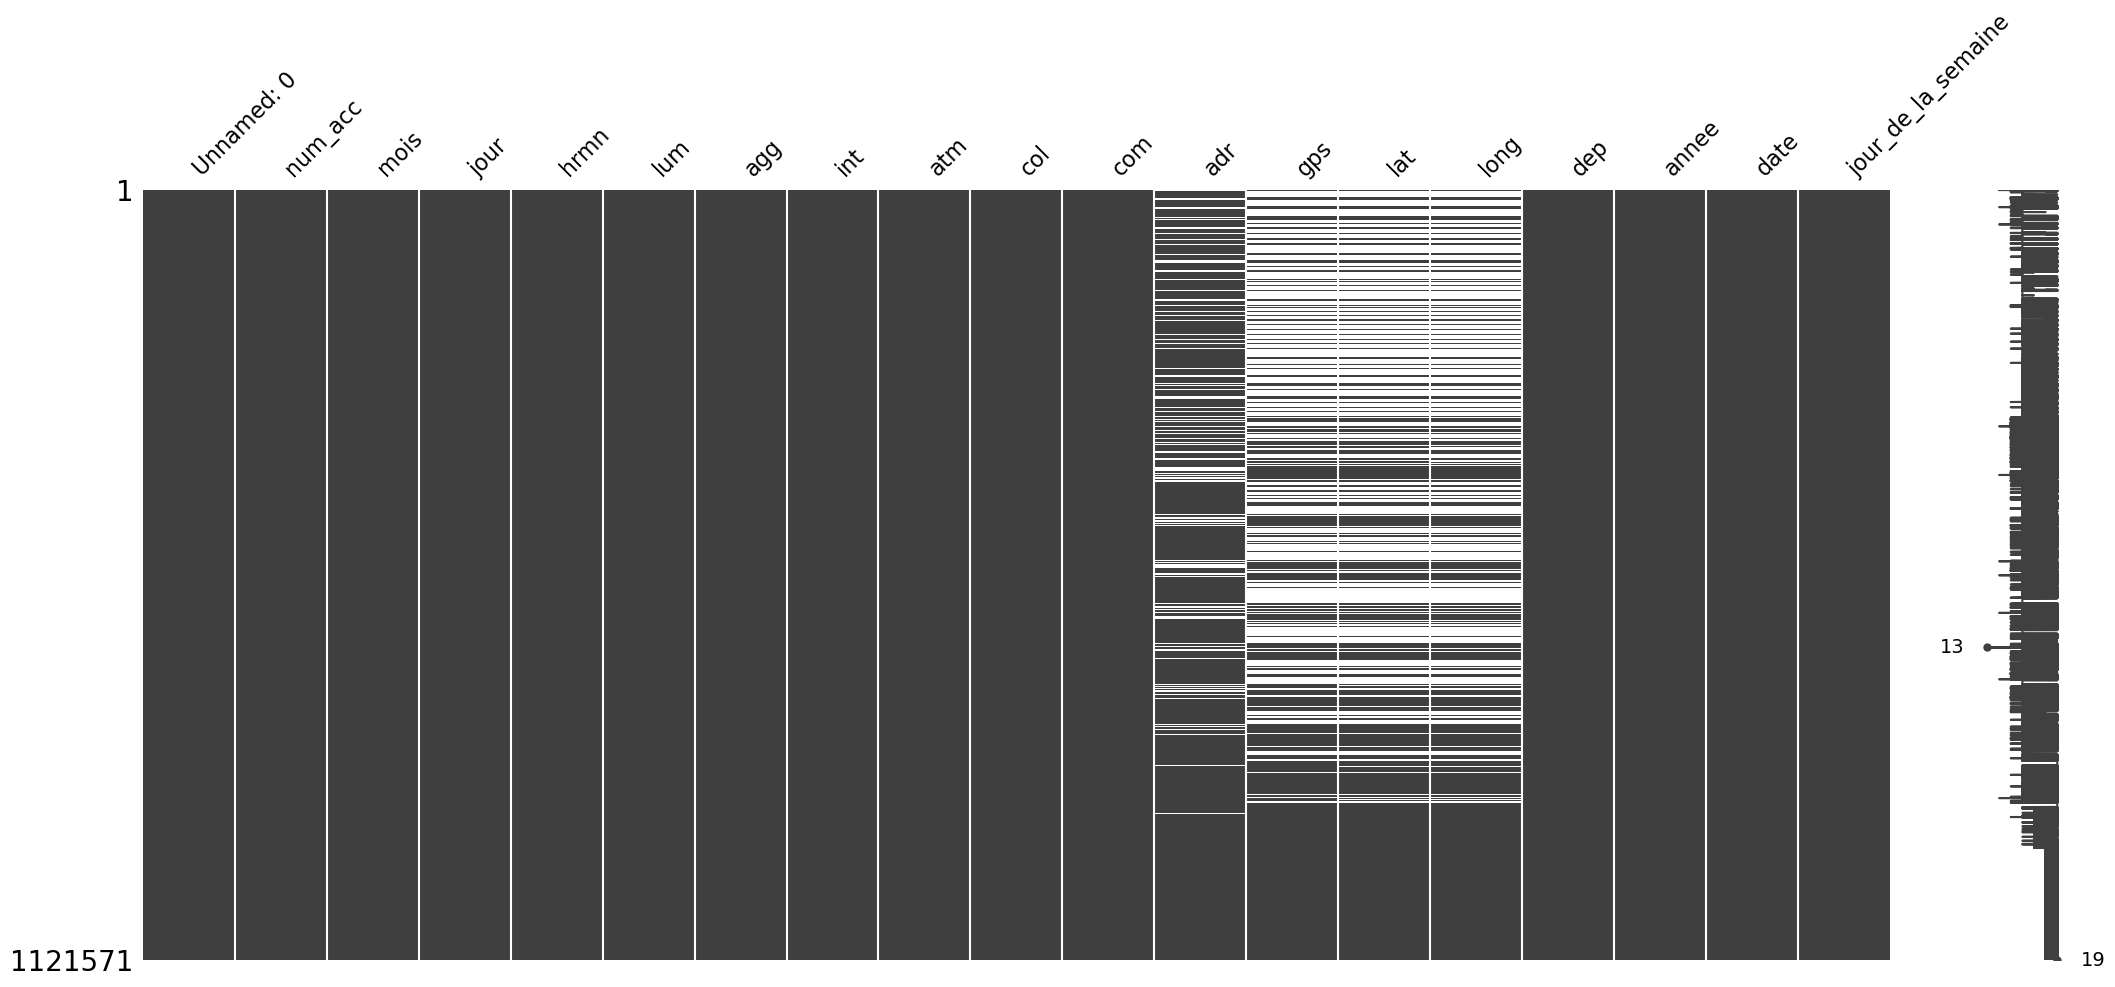

In [277]:
## Plot nullity matrix of carac
fig = msno.matrix(carac)

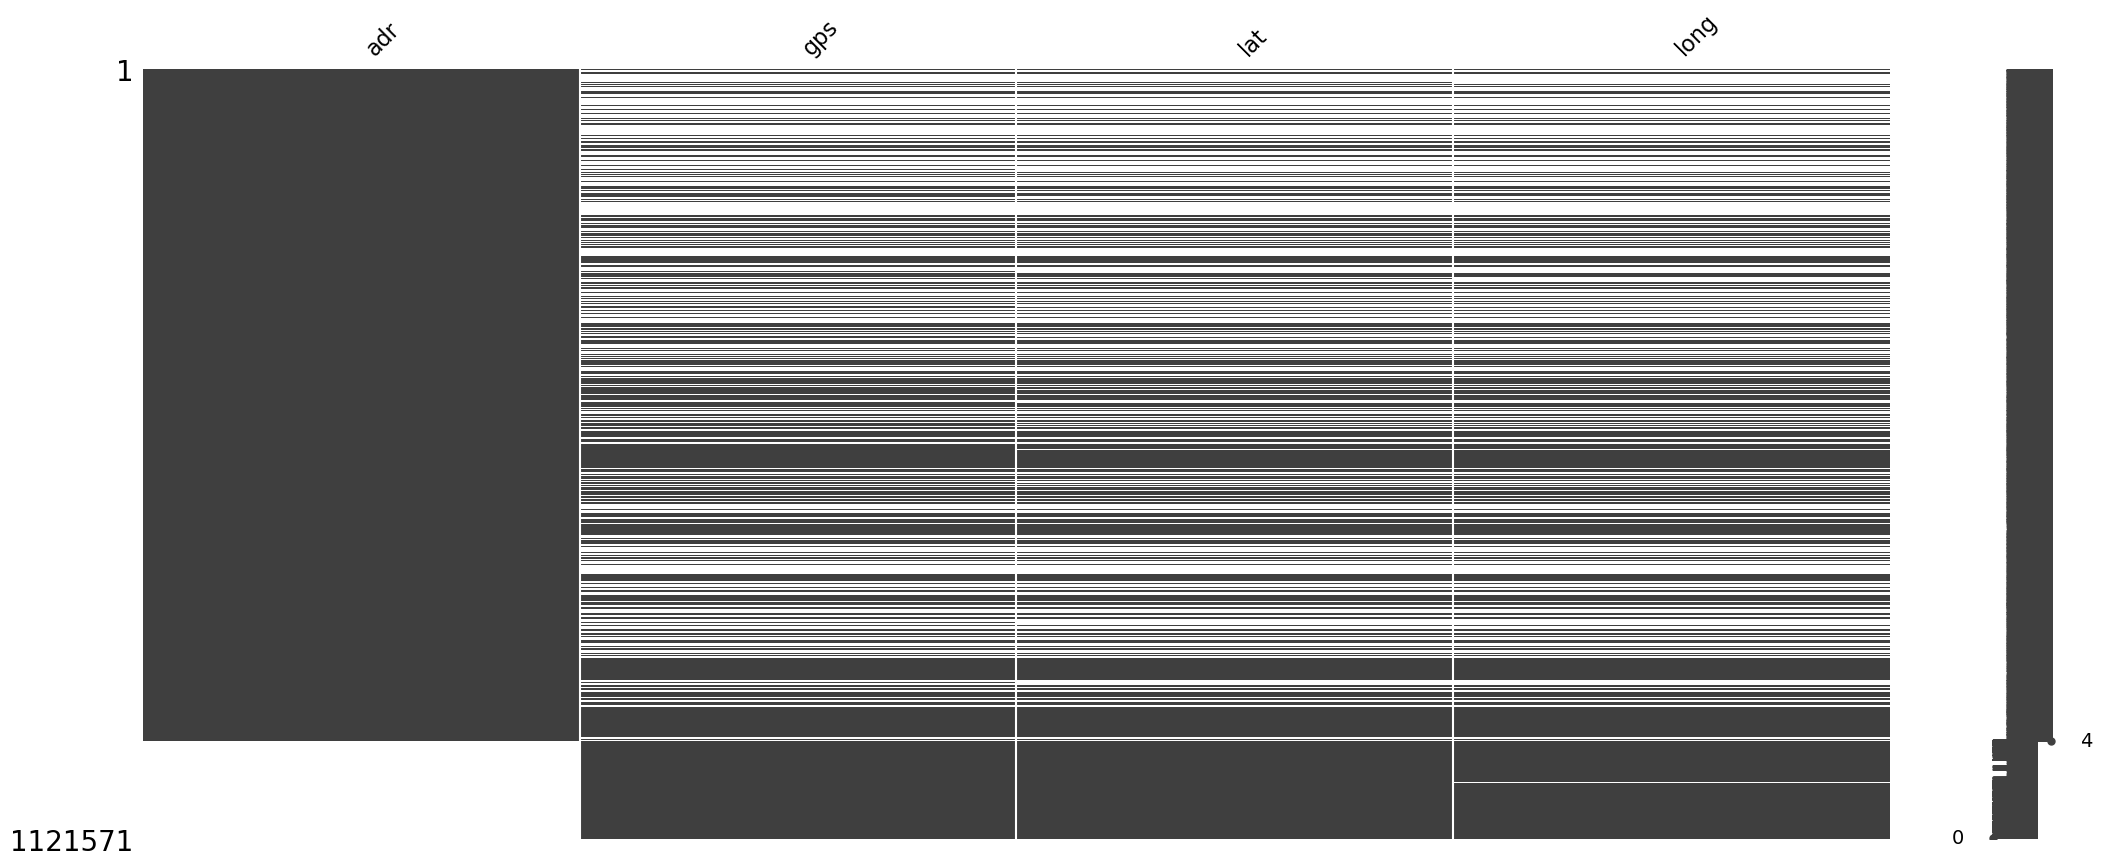

In [279]:
fig = msno.matrix(carac[['adr', 'gps', 'lat', 'long']].sort_values("adr"))

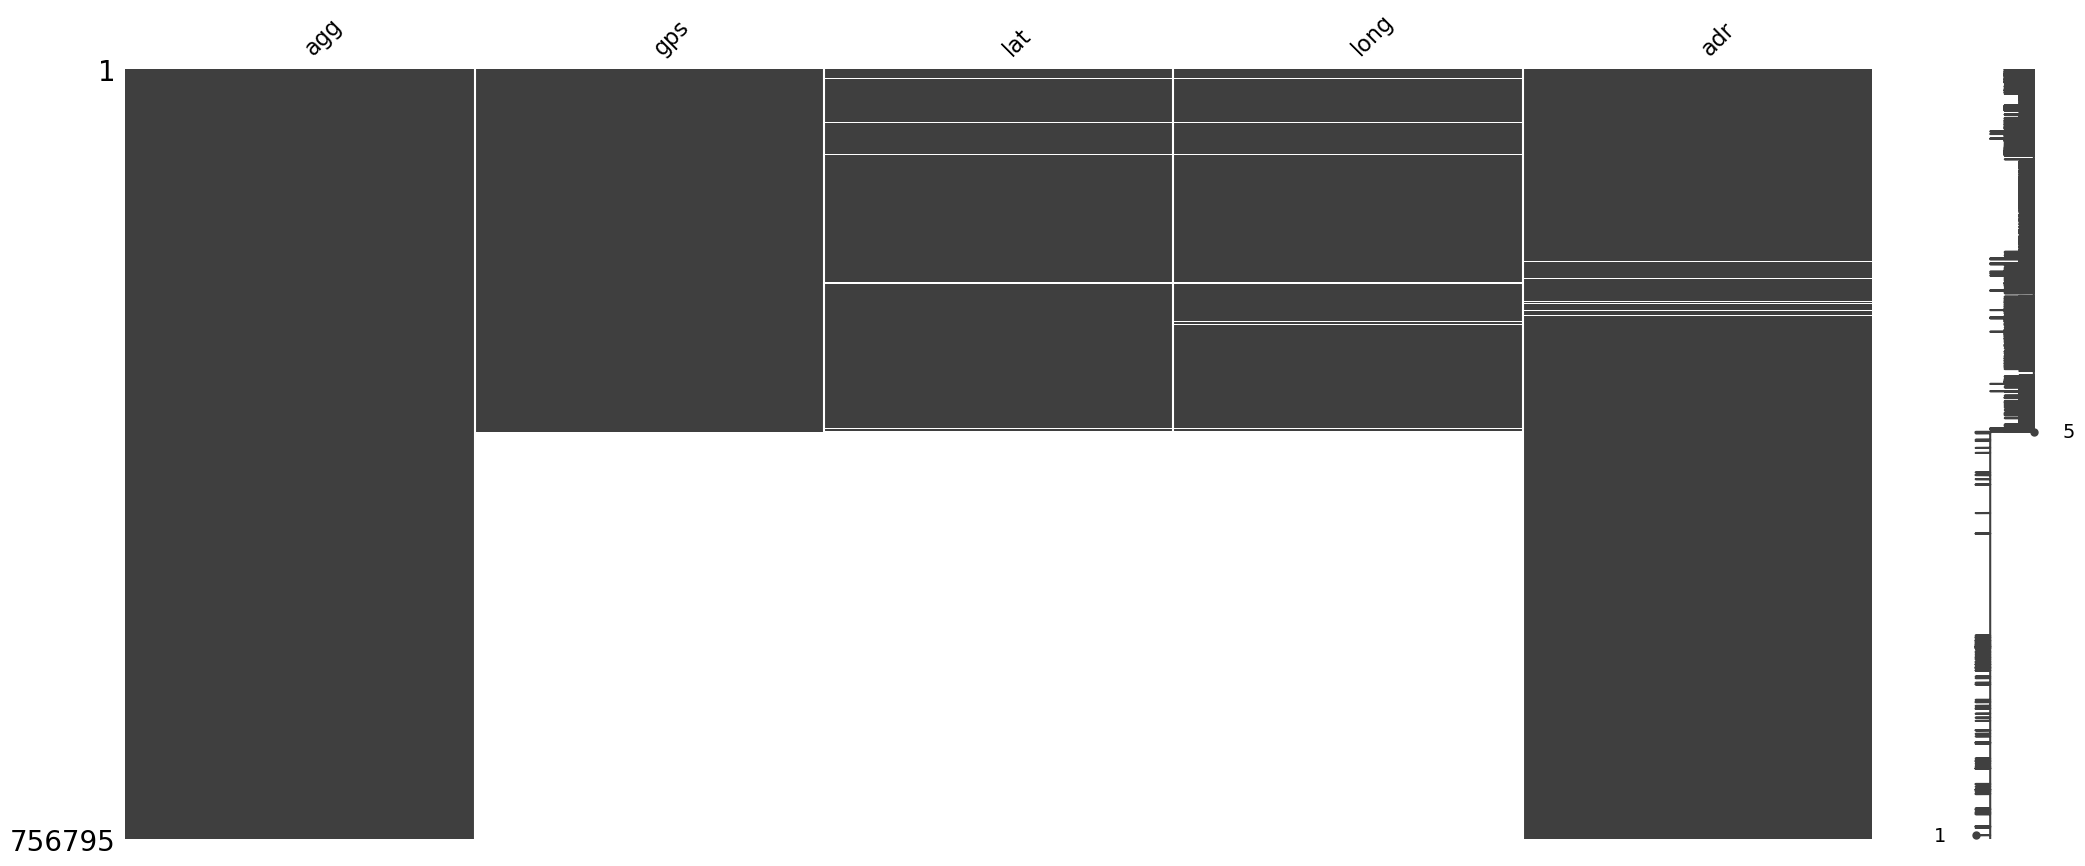

In [280]:
fig = msno.matrix(carac[['agg', 'gps', 'lat', 'long', 'adr']][carac['agg'] == 'En agglomération'].sort_values("gps"))


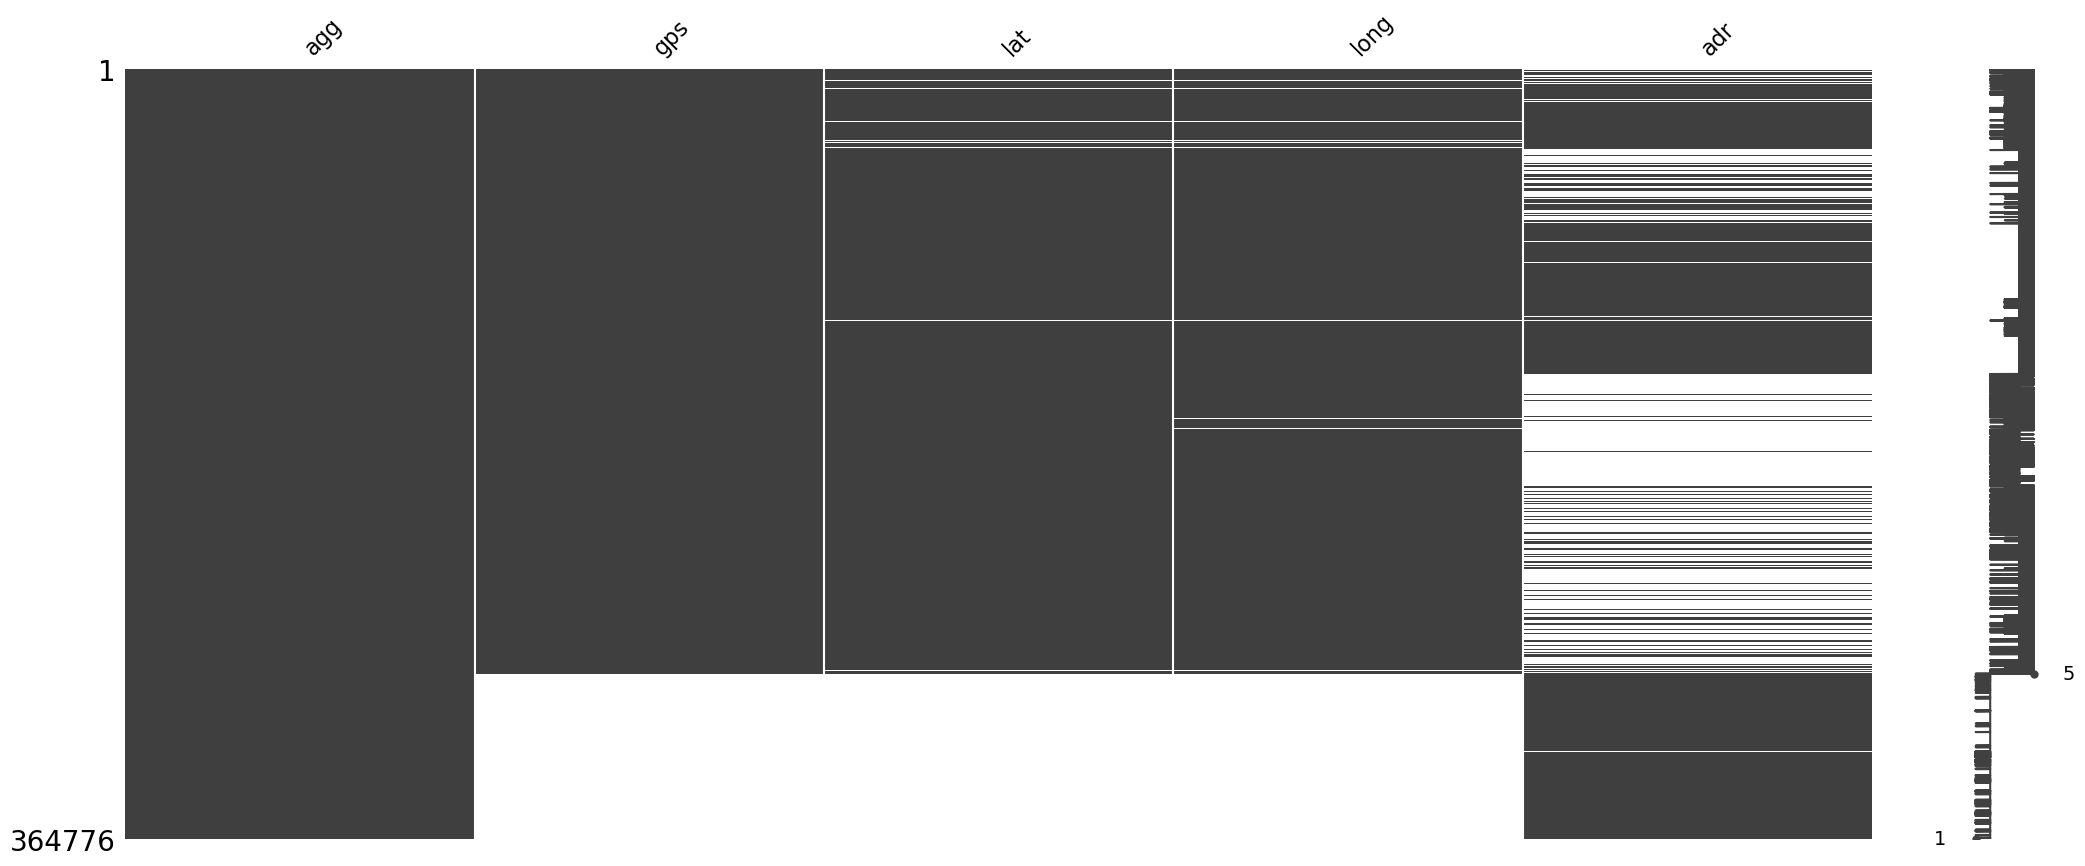

In [281]:
fig = msno.matrix(carac[['agg', 'gps', 'lat', 'long', 'adr']][carac['agg'] == 'Hors agglomération'].sort_values("gps"))

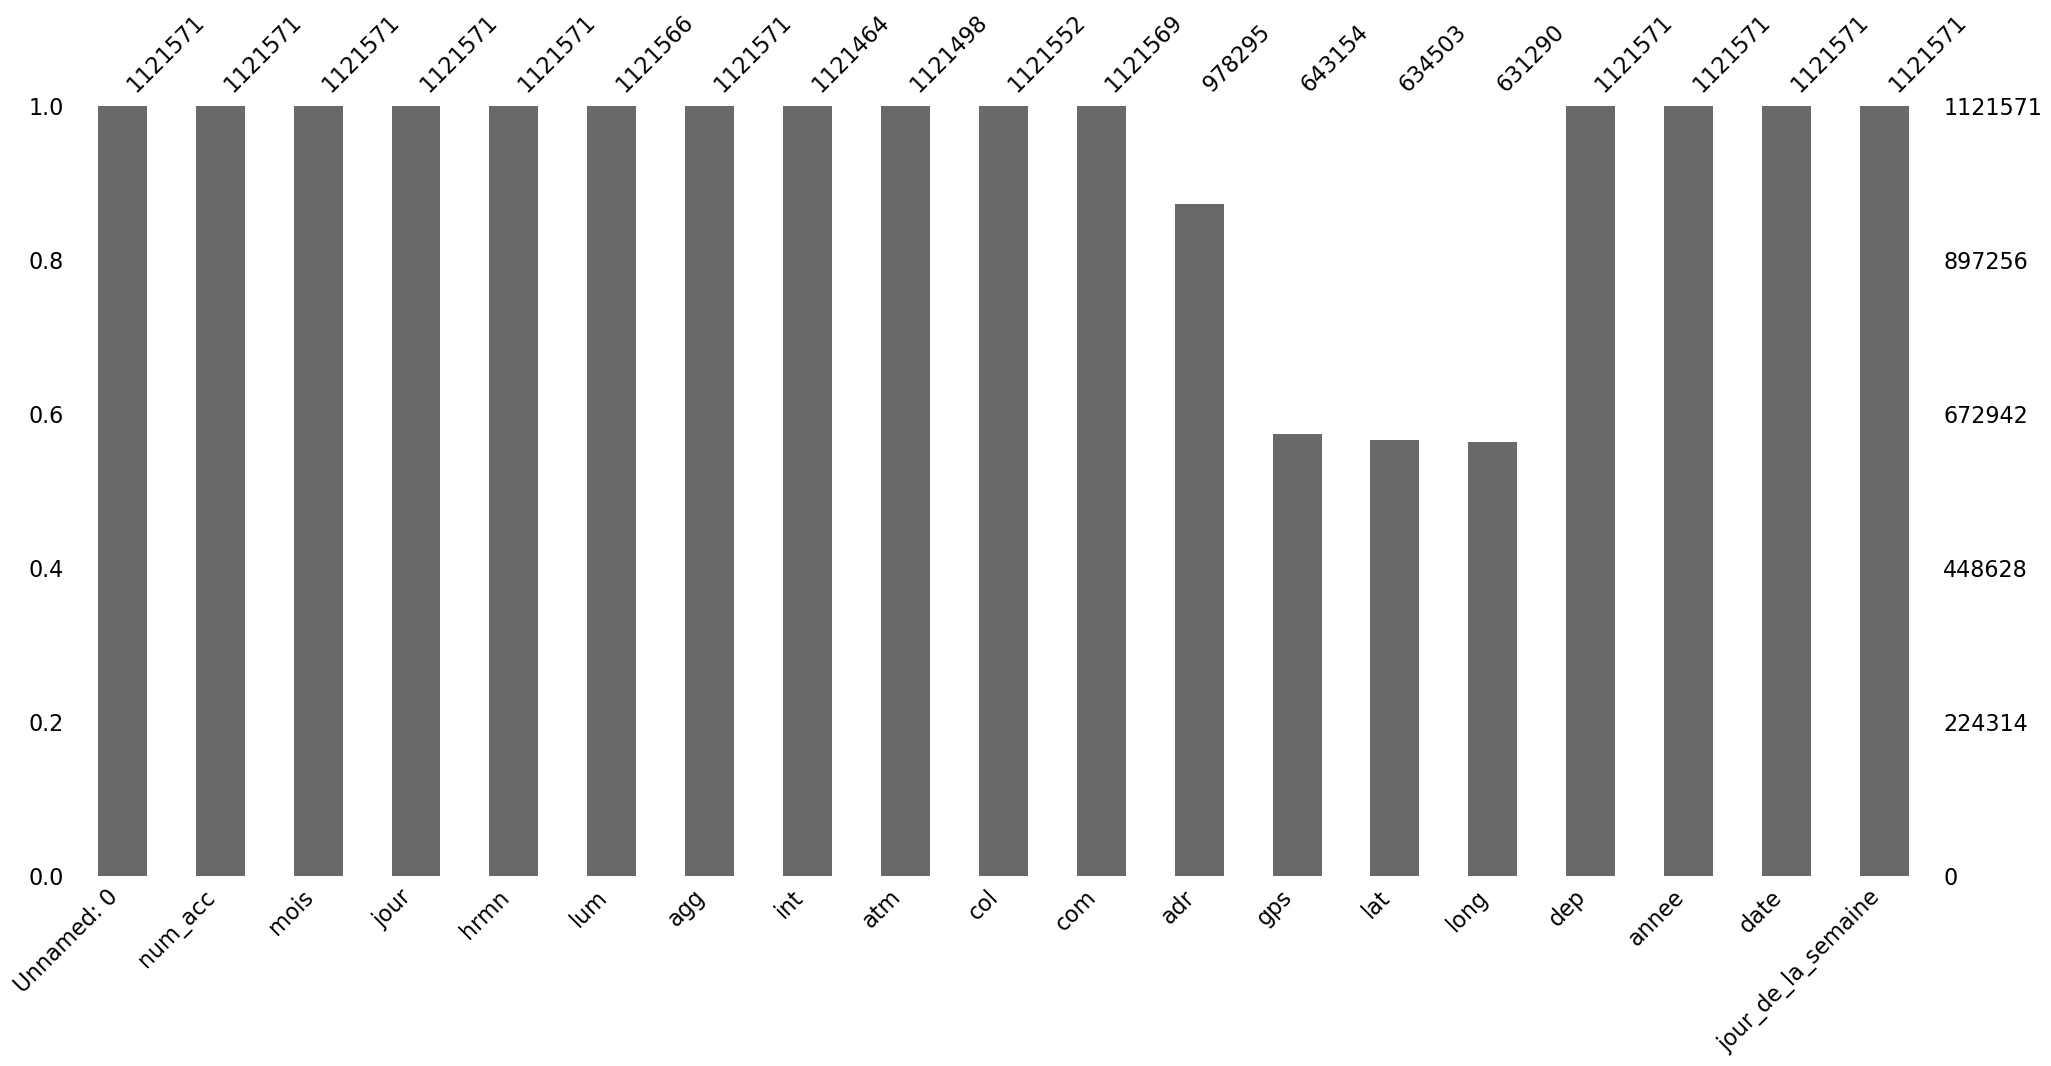

In [282]:
msno.bar(carac);

**Cellule suivante qui était initialement au début et qui a été reportée à la fin :**

In [283]:
# On supprime la colonne 'Unnamed: 0'
carac = carac.drop(['Unnamed: 0'], axis=1)
display(carac.head())

,num_acc,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,annee,date,jour_de_la_semaine
0,200500000001,01,12,1900,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,CD41B,M,5051500.0,294400.0,590,2005,2005-01-12,2
1,200500000002,01,21,1600,Plein jour,En agglomération,Hors intersection,Normale,Deux véhicules - frontale,51,rue de Lille,M,5053700.0,280200.0,590,2005,2005-01-21,4
2,200500000003,01,21,1845,Nuit sans éclairage public,Hors agglomération,Hors intersection,Pluie légère,Deux véhicules - frontale,51,NaN,M,5054600.0,280000.0,590,2005,2005-01-21,4
3,200500000004,01,04,1615,Plein jour,Hors agglomération,Hors intersection,Normale,Trois véhicules et plus - collisions multiples,82,NaN,M,5098700.0,240800.0,590,2005,2005-01-04,1
4,200500000005,01,10,1945,Nuit sans éclairage public,Hors agglomération,Hors intersection,Pluie forte,Autre collision,478,NaN,M,5096400.0,247500.0,590,2005,2005-01-10,0


In [284]:
# Export DataFrame to csv
carac.to_csv("carac1.csv")

In [ ]:
### Dépendances statistiques entre les variables explicatives
### et entre les variables explicatives et la variable cible 'col' """

# Affichage du tableau des corrélations entre chaque paire de variables du DataFrame carac
carac.corr()

,mois,jour,lum,agg,int,atm,col,annee
mois,1.000000,-0.017122,0.057560,-0.008961,0.001299,0.012980,-0.005524,0.006973
jour,-0.017122,1.000000,-0.005486,-0.003308,-0.001665,-0.006287,-0.002461,0.002873
lum,0.057560,-0.005486,1.000000,0.086452,0.020221,0.027874,0.064903,-0.003403
agg,-0.008961,-0.003308,0.086452,1.000000,0.161032,-0.060203,0.013123,-0.041653
int,0.001299,-0.001665,0.020221,0.161032,1.000000,0.002357,-0.062131,0.079246
atm,0.012980,-0.006287,0.027874,-0.060203,0.002357,1.000000,0.023616,0.010897
col,-0.005524,-0.002461,0.064903,0.013123,-0.062131,0.023616,1.000000,-0.014385
annee,0.006973,0.002873,-0.003403,-0.041653,0.079246,0.010897,-0.014385,1.000000


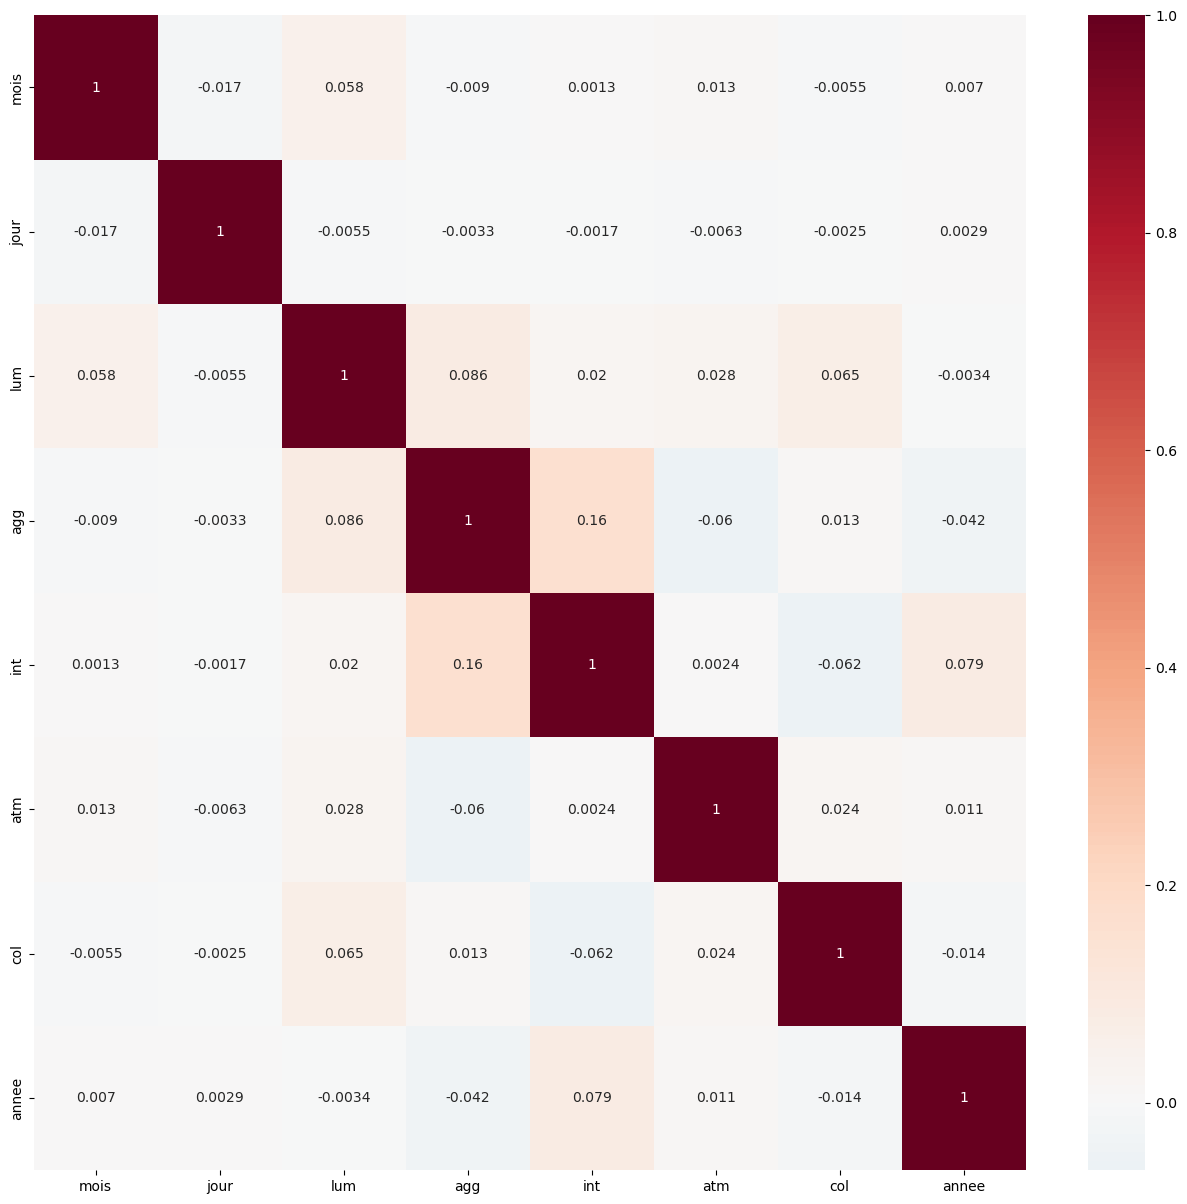

In [ ]:
# Heatmap de corrélations entre toutes les variables du DataFrame carac permetttant de repérer les variables importantes
# et celles colinéaires entre elles
correlation_matrix = carac.corr()
plt.figure(figsize=(16, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.show()

In [ ]:
# On peut constater que toutes les variables explicatives sont décorrélées les unes par rapport aux autres.
# Les variables explicatives sont décorrélées par rapport à la variable cible du DataFrame carac ('col')

In [ ]:
# calculate summary statistics based on user-selected variables
# Create a list of user-selected variables
user_list = ["Education", "Above/Below 50k"]

# Create a GroupBy object using this list
gb = adult.groupby(by=user_list)

# Find the mean for the variable "Hours/Week" for each group - Be efficient!
print(gb["Hours/Week"].mean())